In [365]:
import openpyxl
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
dataset=pd.read_excel("./PCOS_data_without_infertility.xlsx",sheet_name=1)


In [247]:
print(pd.isnull(dataset).sum())



Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [248]:

count=0
for i in dataset['PCOS (Y/N)']:
    if i==1:
        count+=1
print("the number of pcos affected person", +count)


age=[]
freq=[]
dd=list(dataset['Weight (Kg)'])
for i in dataset['Weight (Kg)']:
    if i not in age:
        age.append(i)
        freq.append( dd.count(i))
print(age)
print(freq)



the number of pcos affected person 177
[44.6, 65.0, 68.8, 52.0, 74.1, 64.0, 58.5, 40.0, 71.0, 49.0, 74.0, 50.0, 57.3, 80.5, 43.0, 69.2, 52.4, 85.0, 64.2, 63.0, 42.0, 76.0, 68.0, 62.0, 56.0, 57.0, 58.0, 54.0, 73.0, 72.0, 53.0, 78.0, 33.0, 59.0, 75.0, 51.0, 67.0, 60.0, 55.0, 61.0, 70.0, 48.0, 108.0, 57.6, 43.7, 61.6, 69.5, 74.4, 45.0, 83.5, 62.5, 67.5, 91.4, 61.7, 62.2, 64.3, 68.6, 80.0, 71.2, 83.0, 79.0, 89.0, 53.4, 69.0, 56.4, 49.3, 53.2, 60.8, 46.0, 72.3, 59.6, 73.5, 88.0, 66.0, 66.3, 47.0, 47.8, 76.8, 31.0, 74.3, 58.1, 53.6, 104.0, 63.8, 62.7, 32.0, 35.0, 34.0, 53.5, 64.4, 58.9, 55.1, 55.7, 65.7, 36.0, 55.5, 82.0, 80.4, 77.9, 60.5, 76.9, 65.6, 38.0, 54.7, 71.8, 45.6, 71.5, 44.0, 61.8, 94.0, 66.1, 87.9, 44.8, 49.1, 52.9, 54.3, 63.2]
[1, 25, 1, 27, 3, 17, 1, 10, 8, 3, 5, 34, 1, 1, 3, 1, 1, 5, 1, 16, 5, 4, 15, 15, 22, 12, 13, 19, 3, 7, 12, 5, 2, 12, 4, 7, 7, 36, 20, 15, 10, 12, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 4, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1

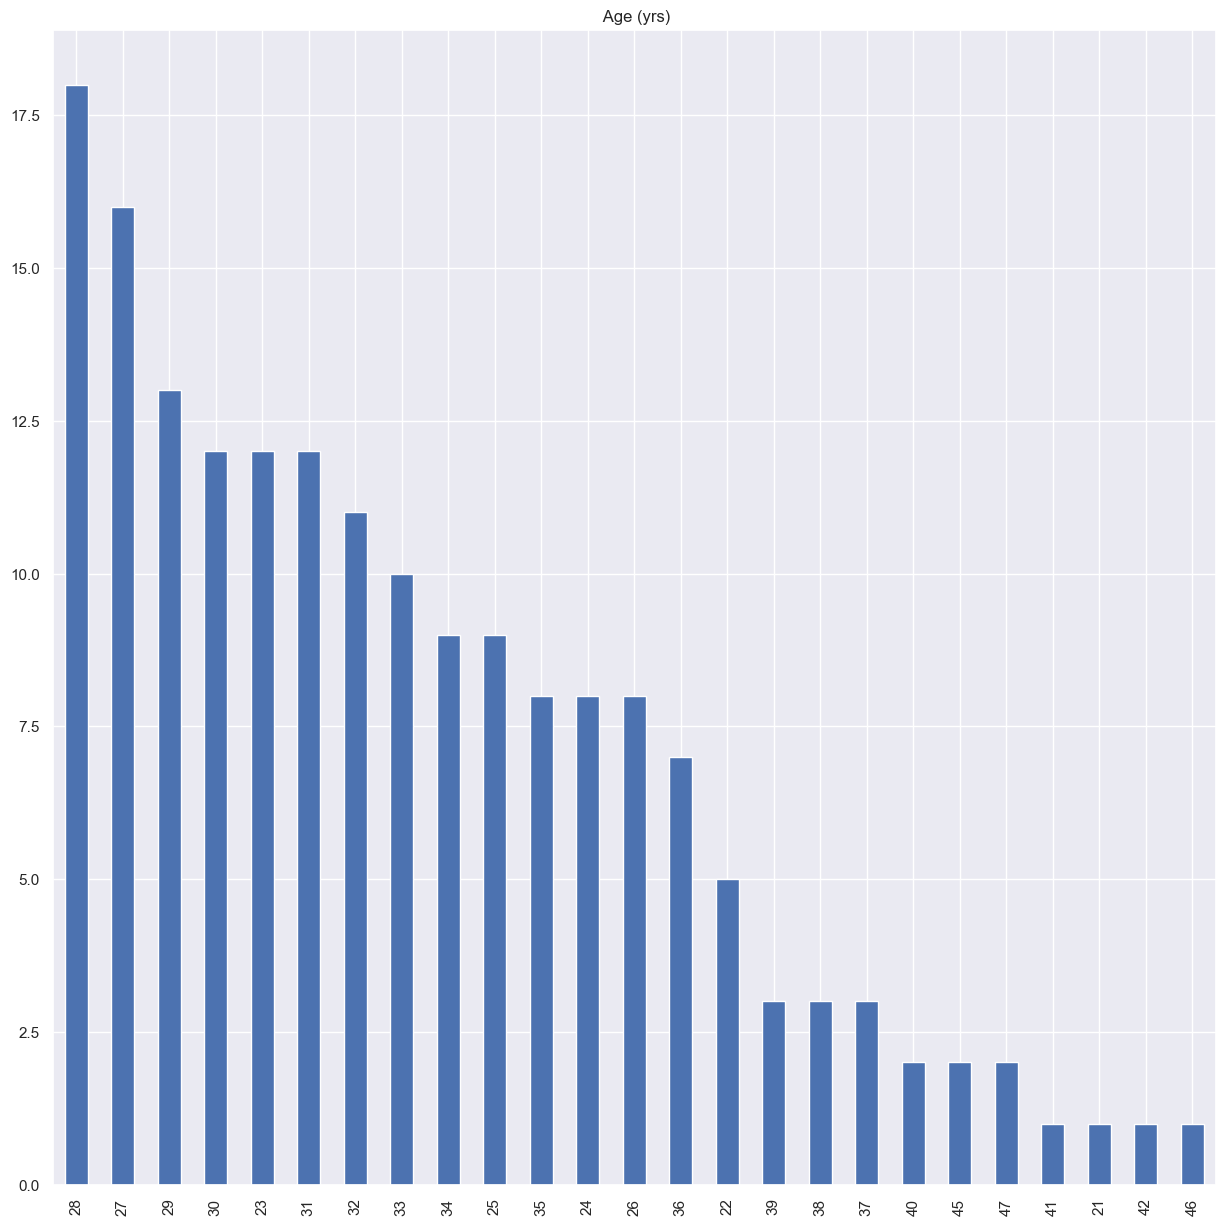

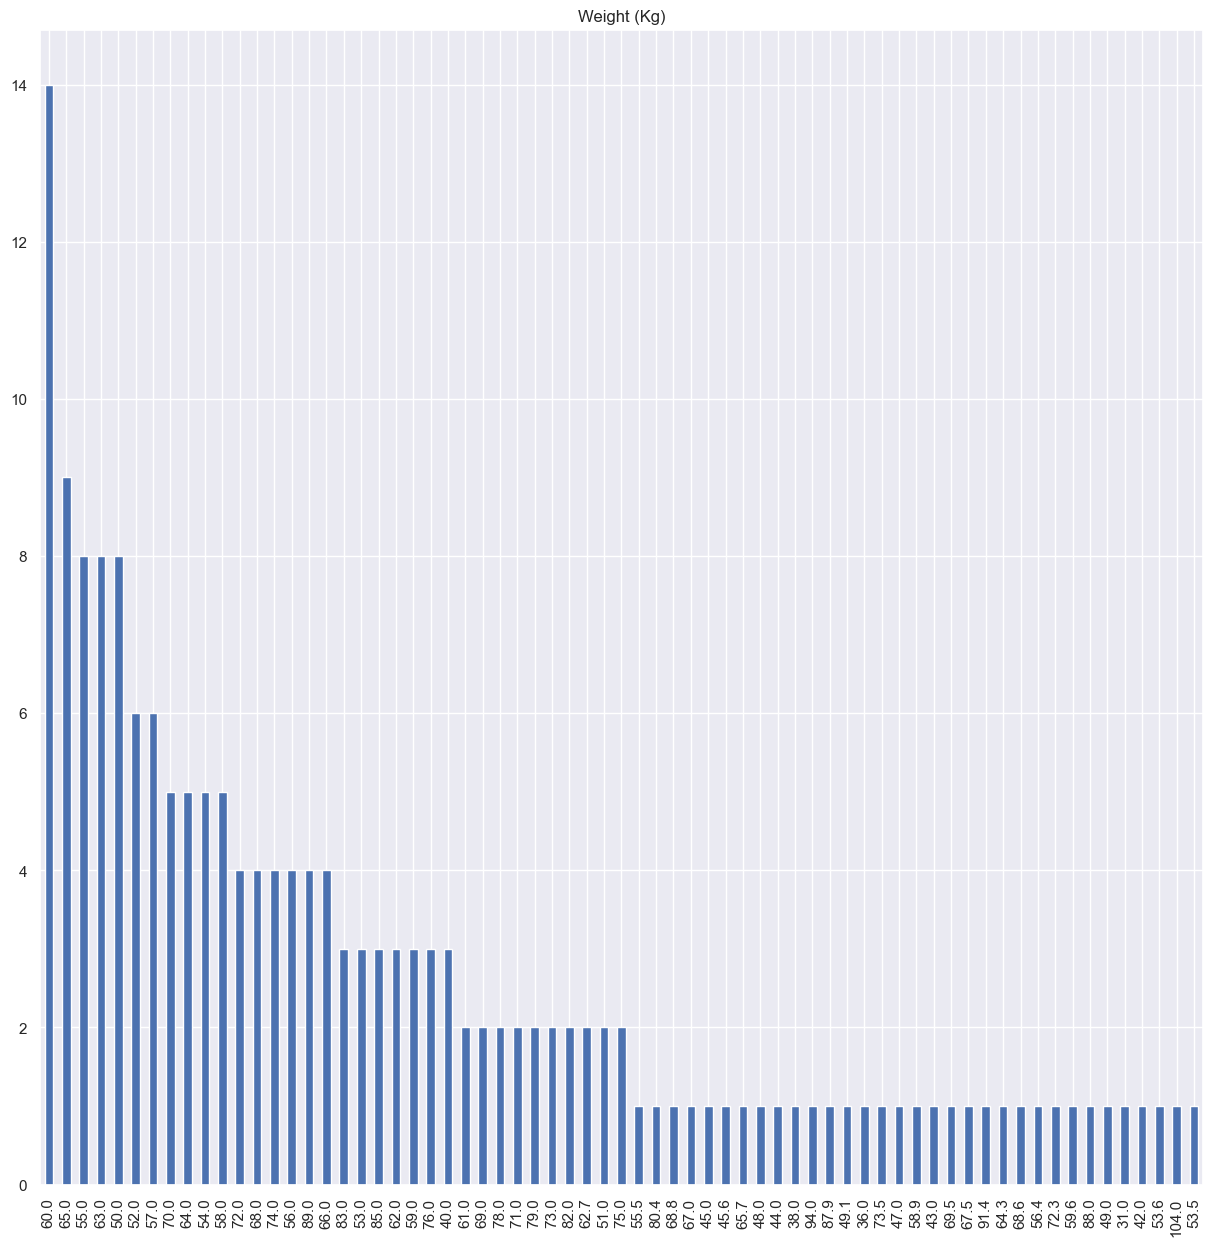

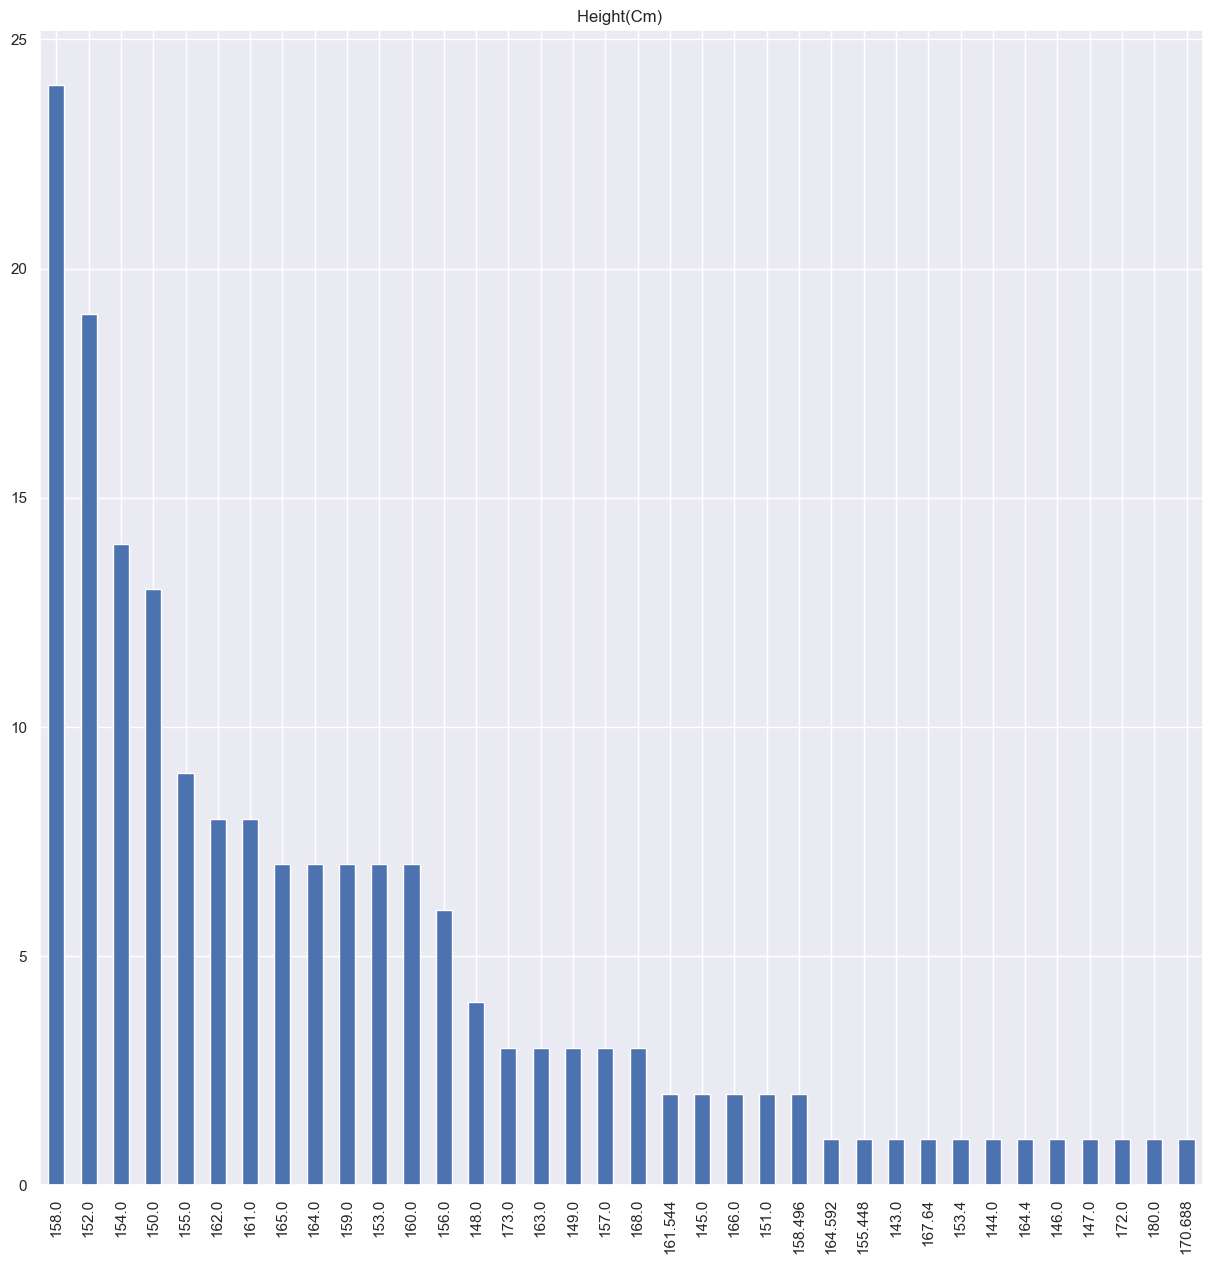

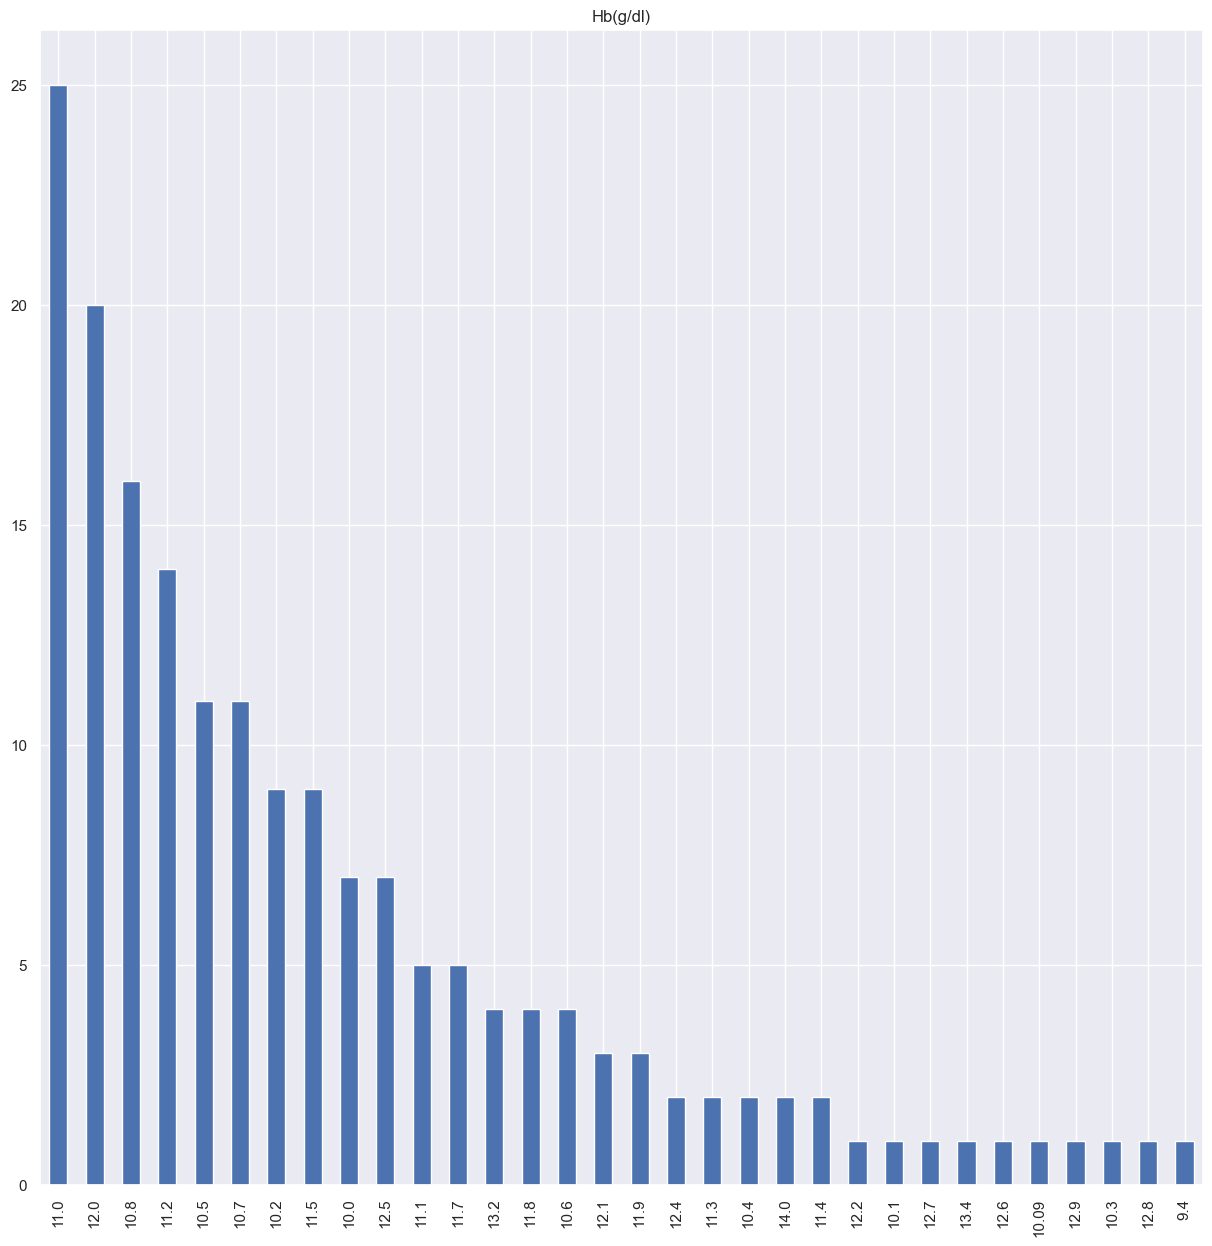

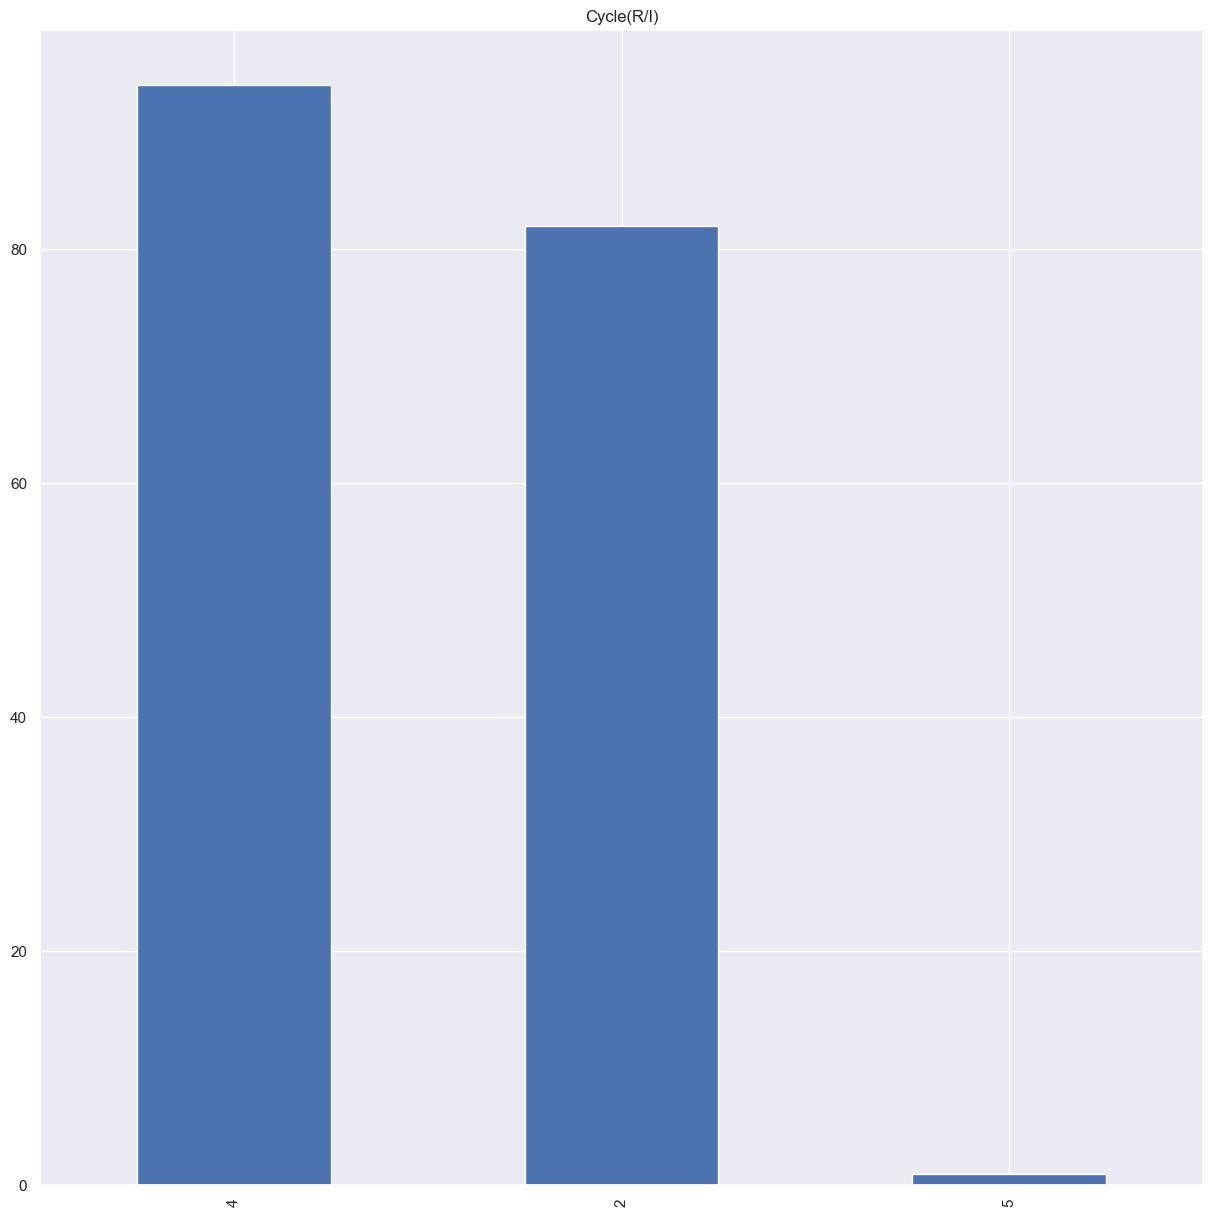

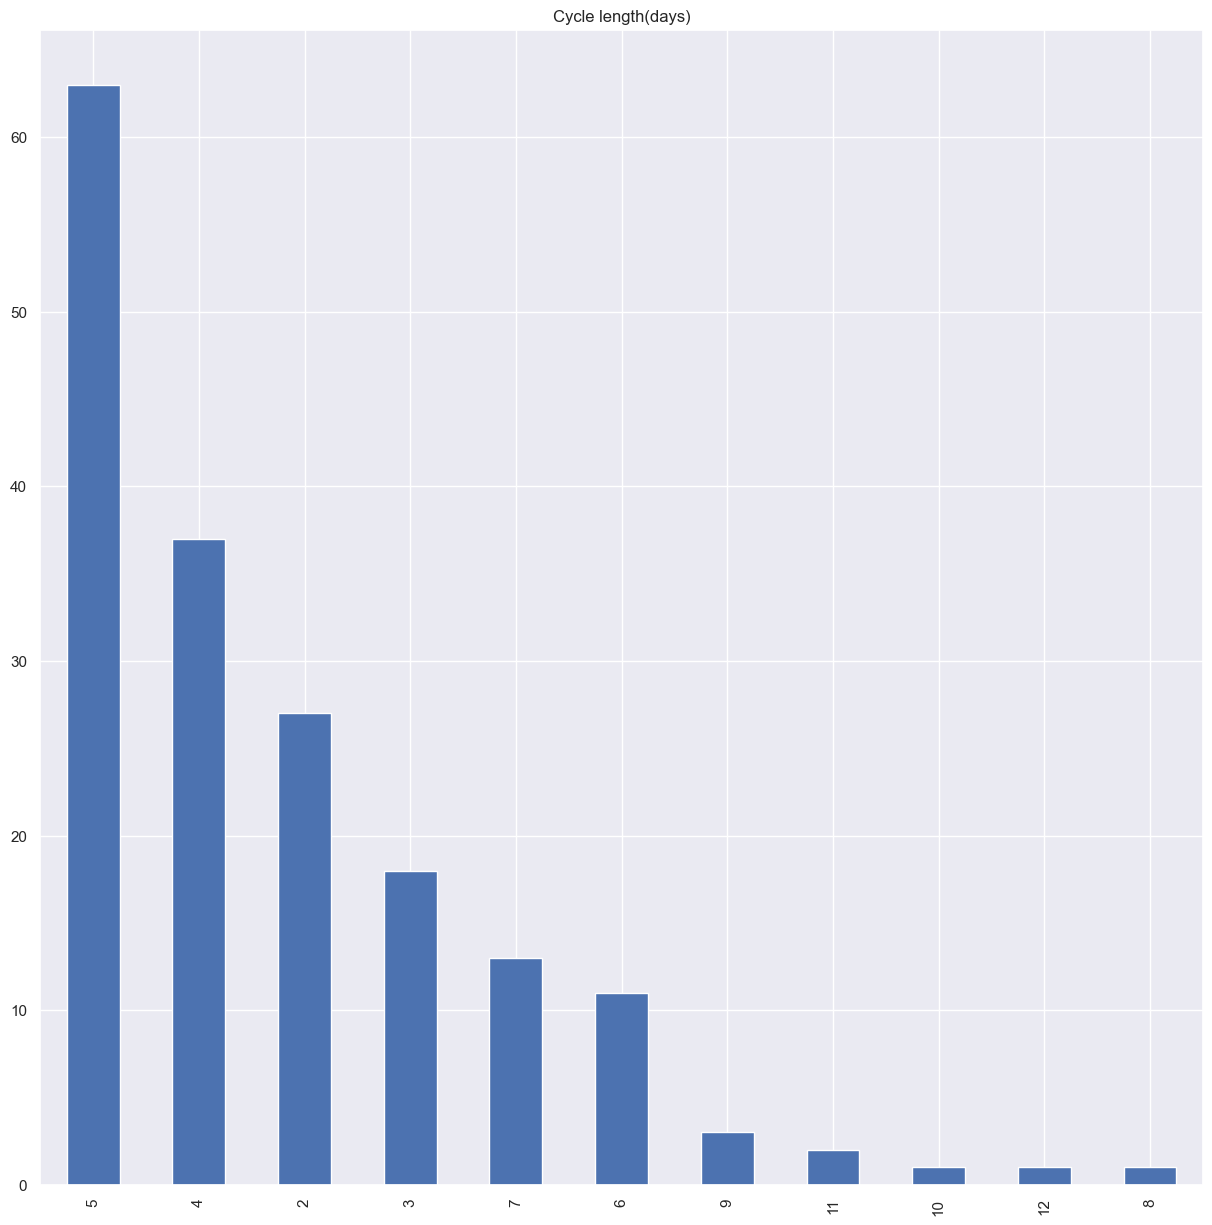

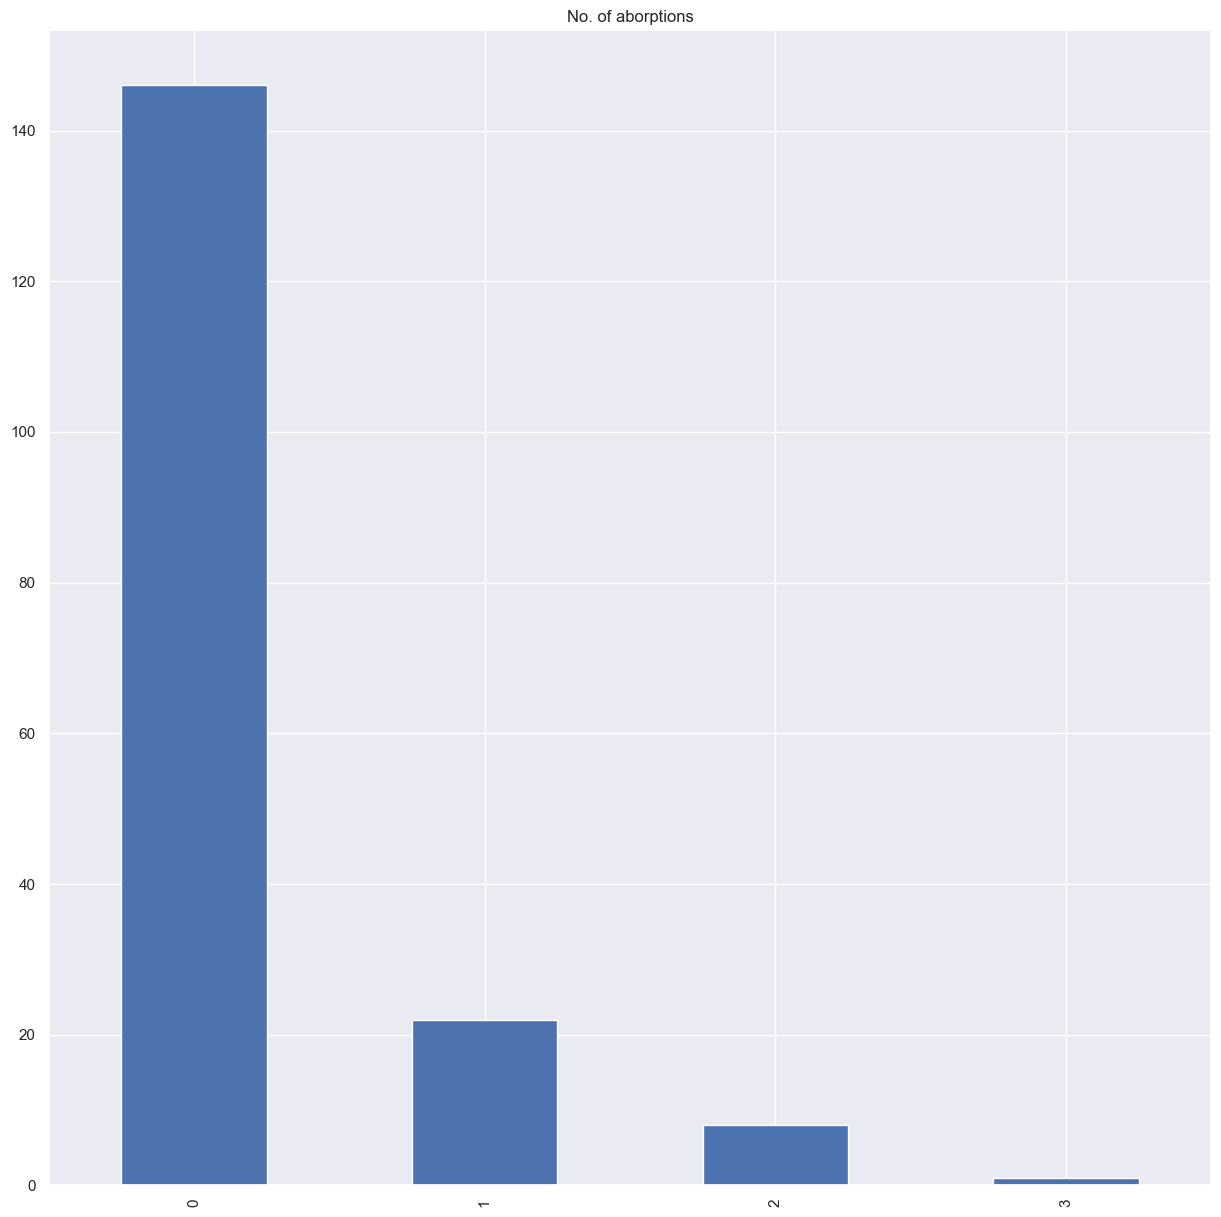

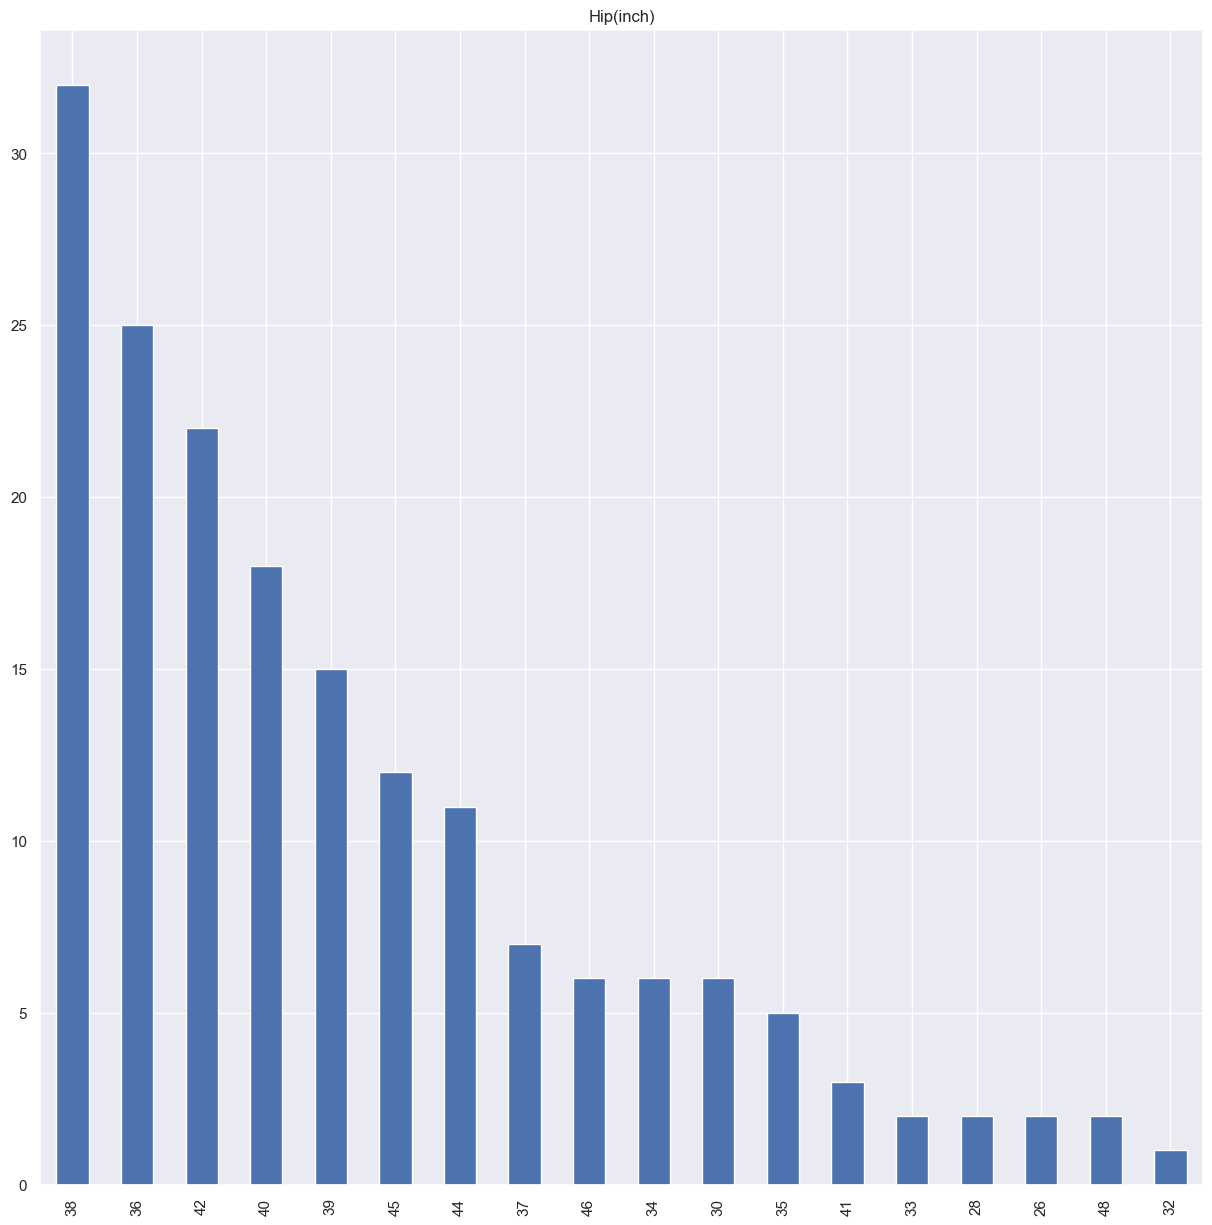

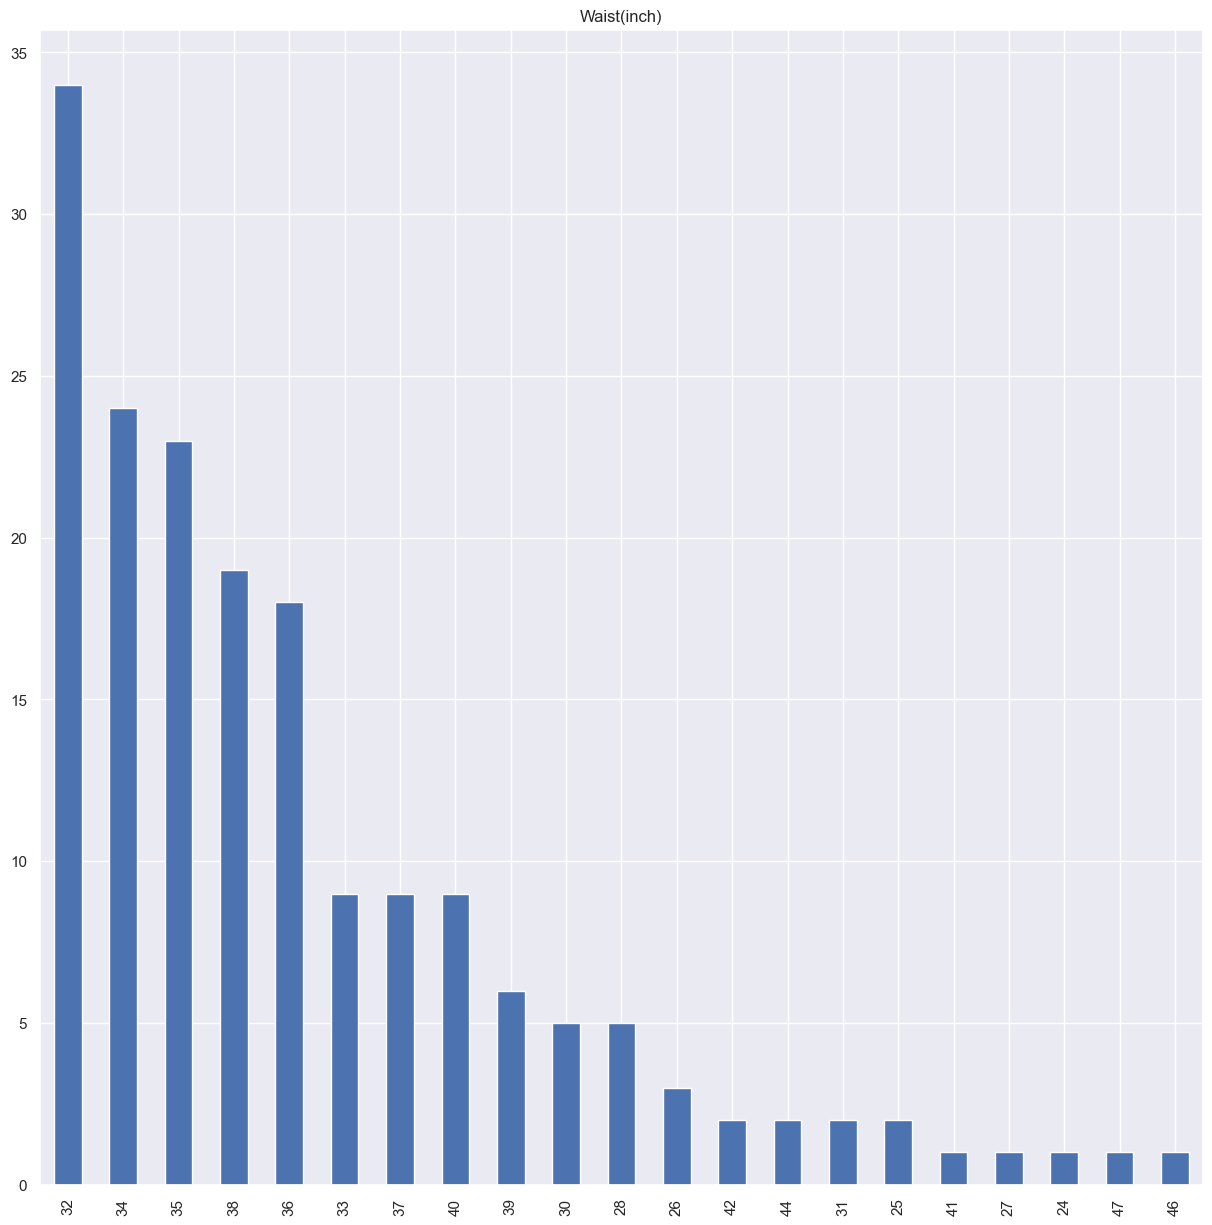

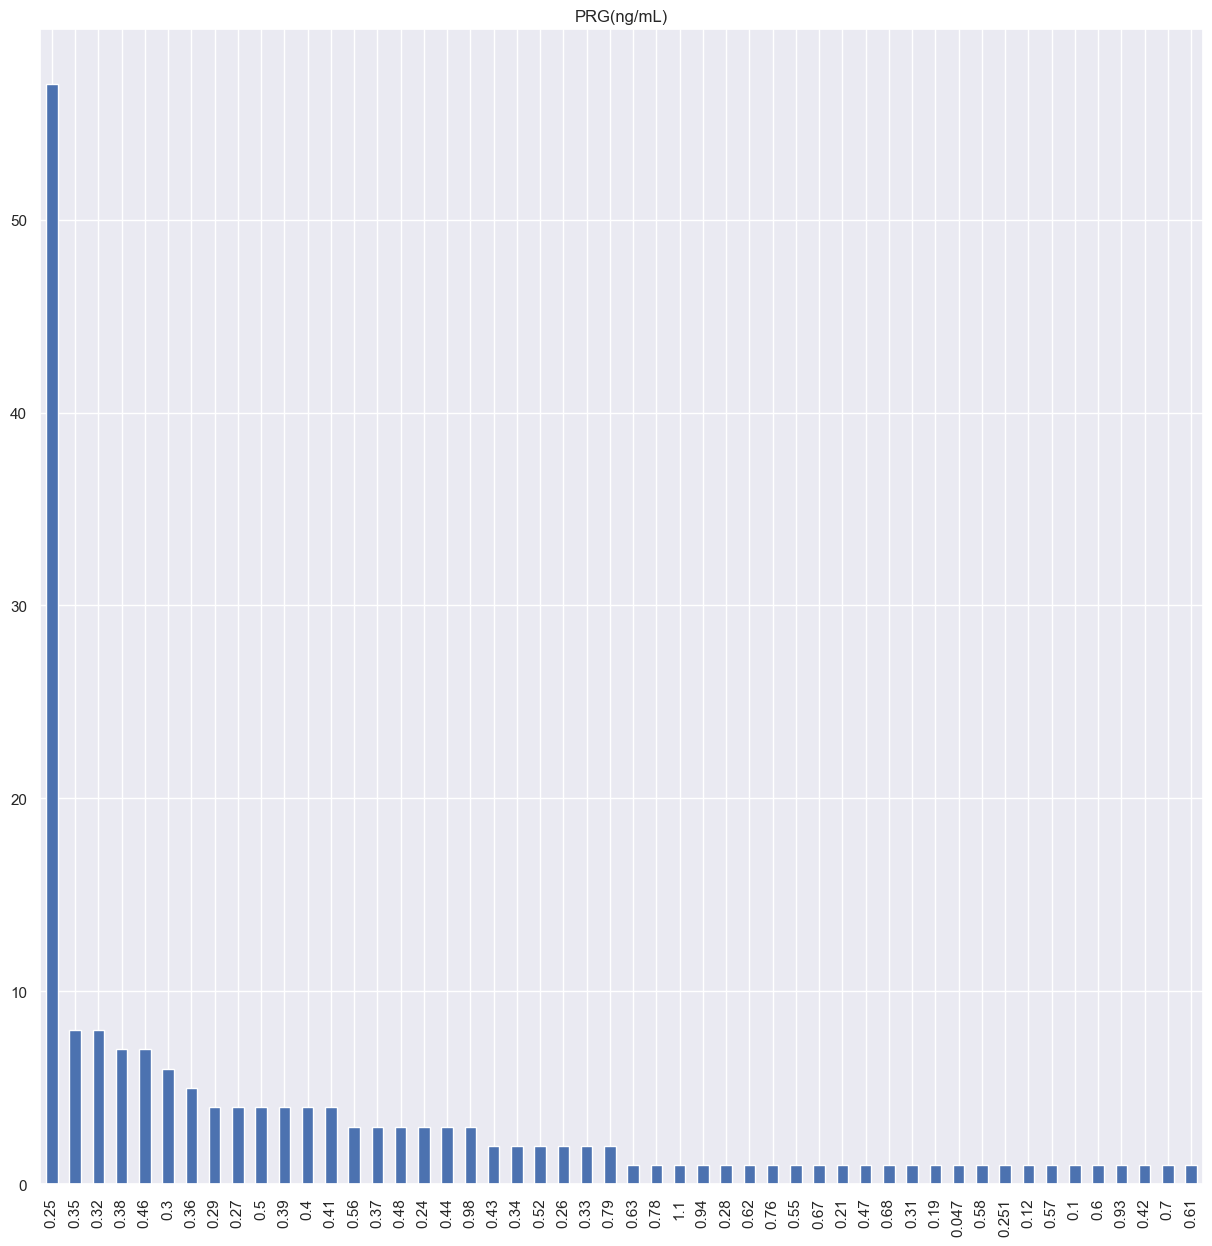

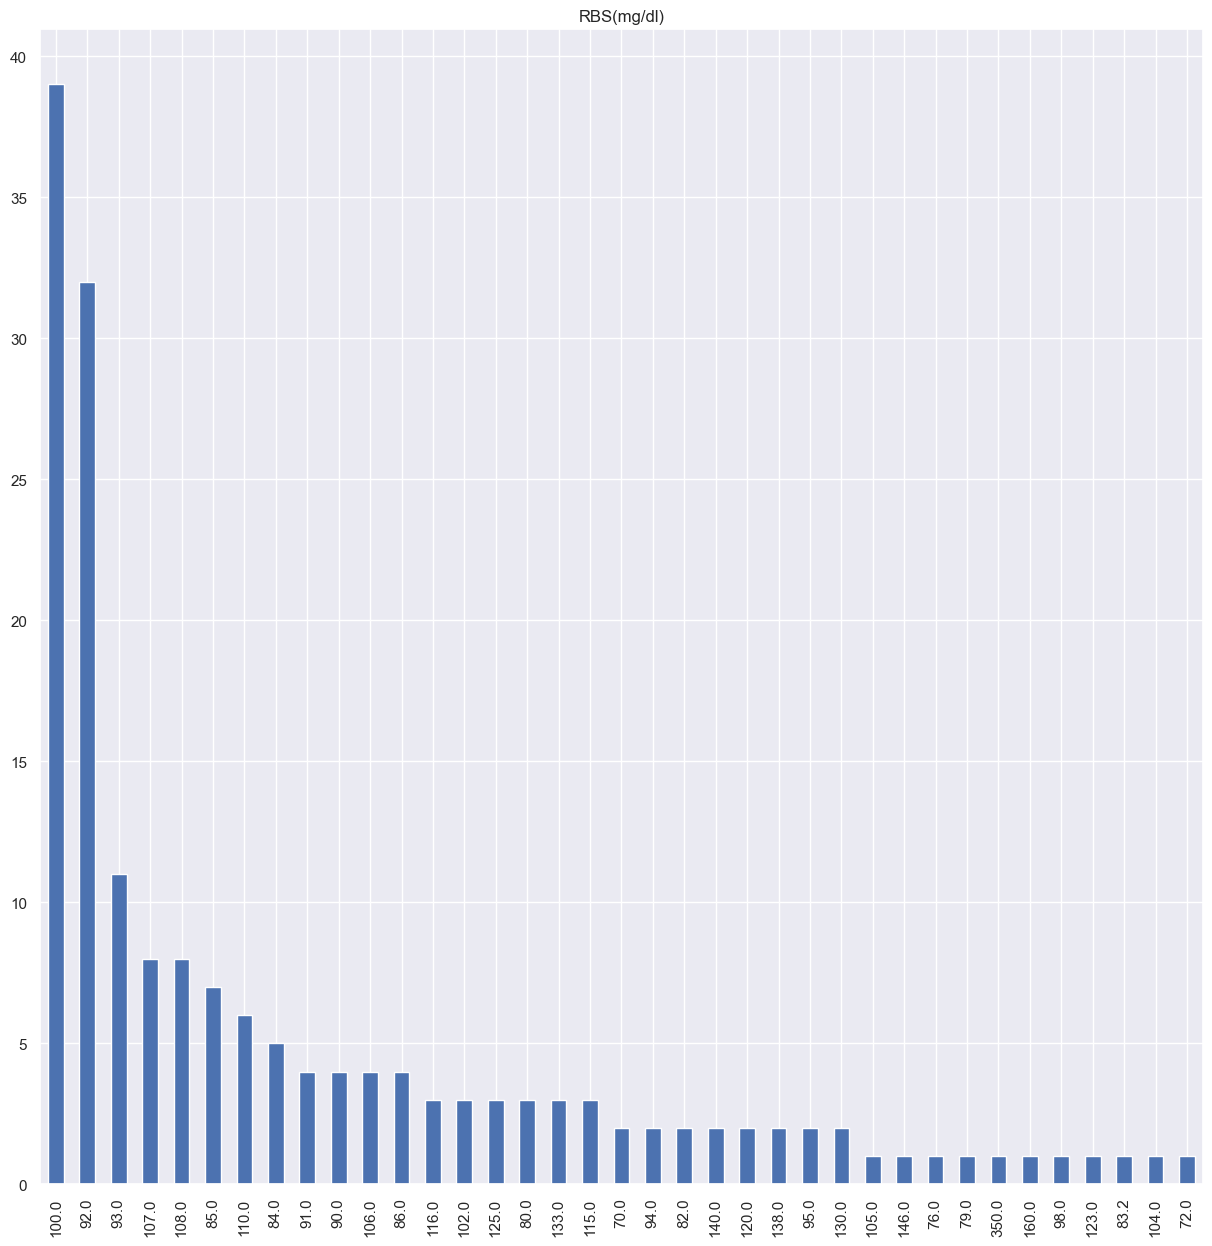

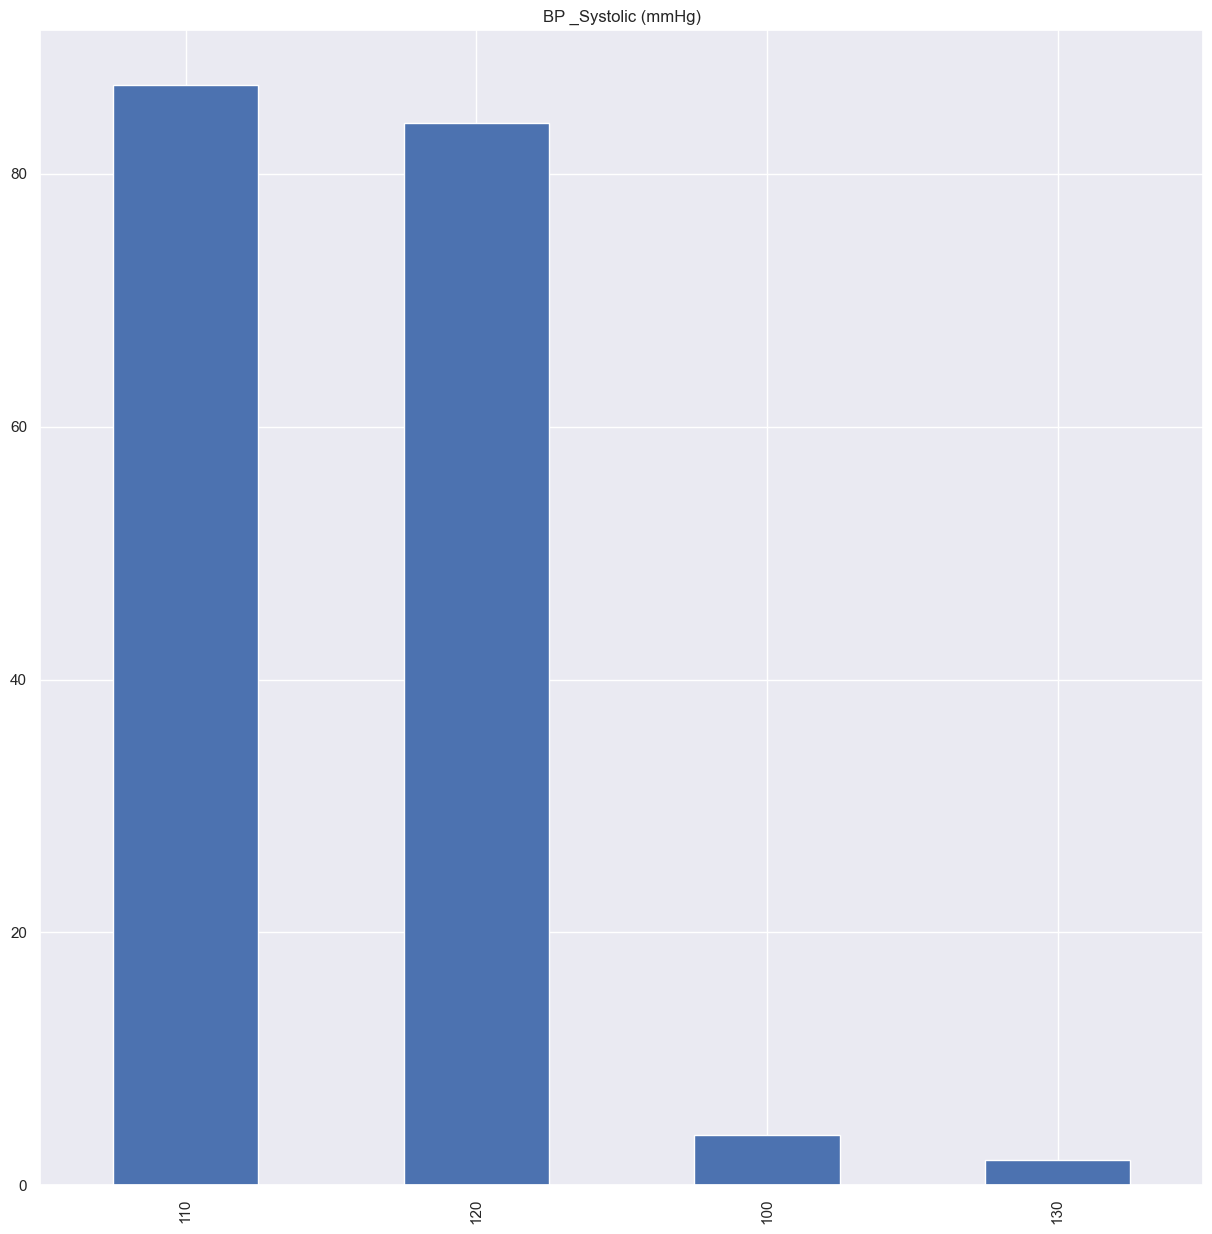

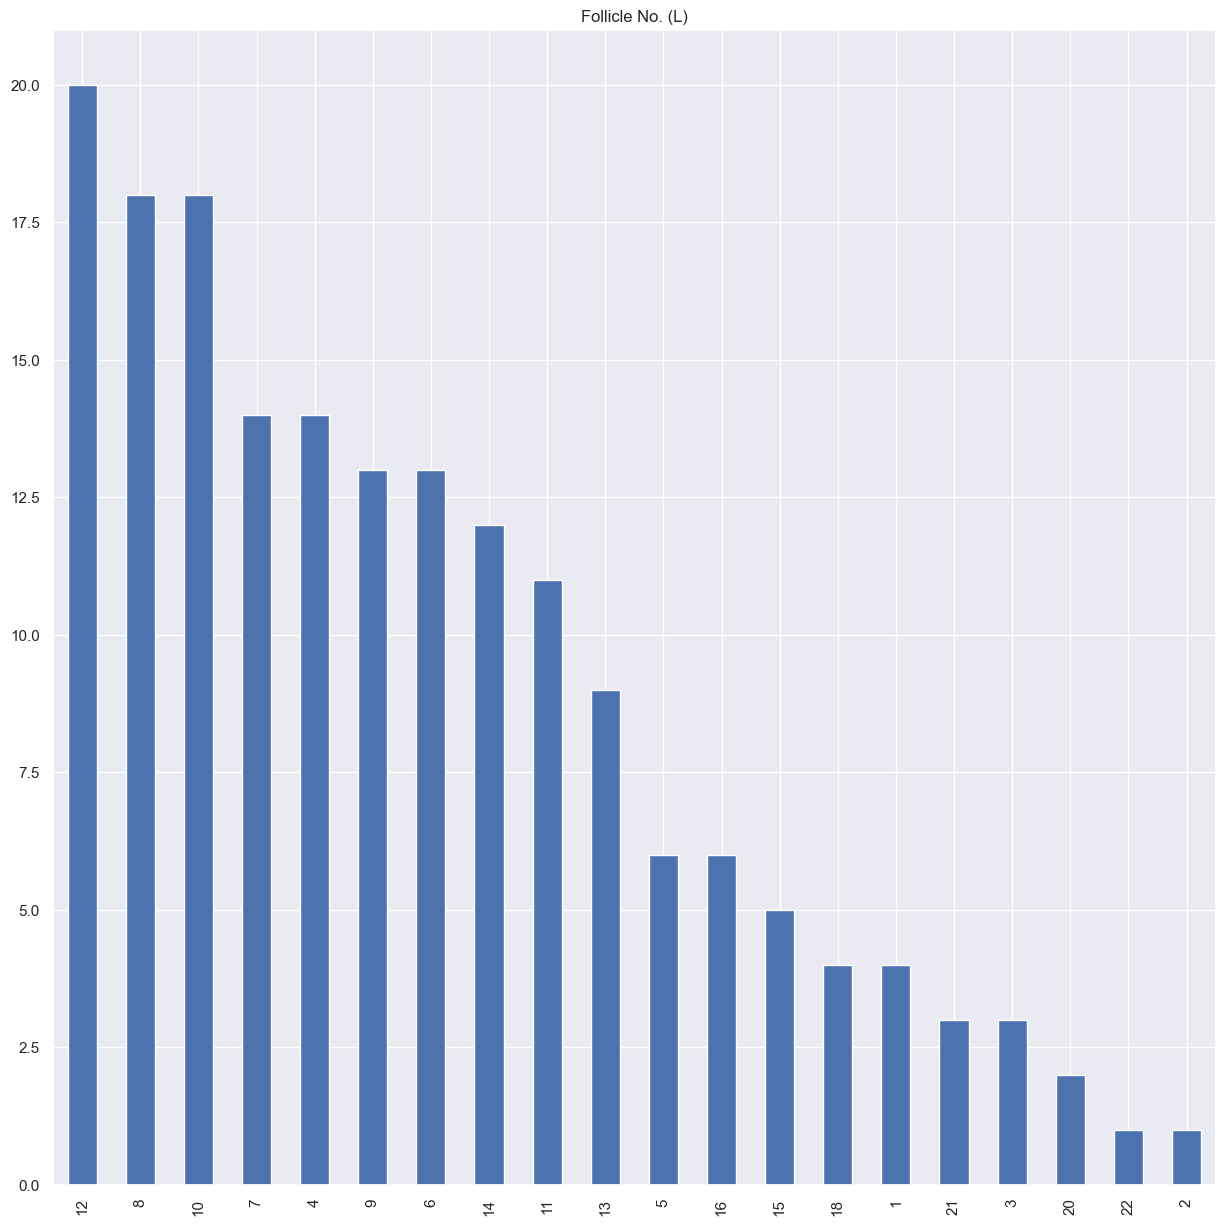

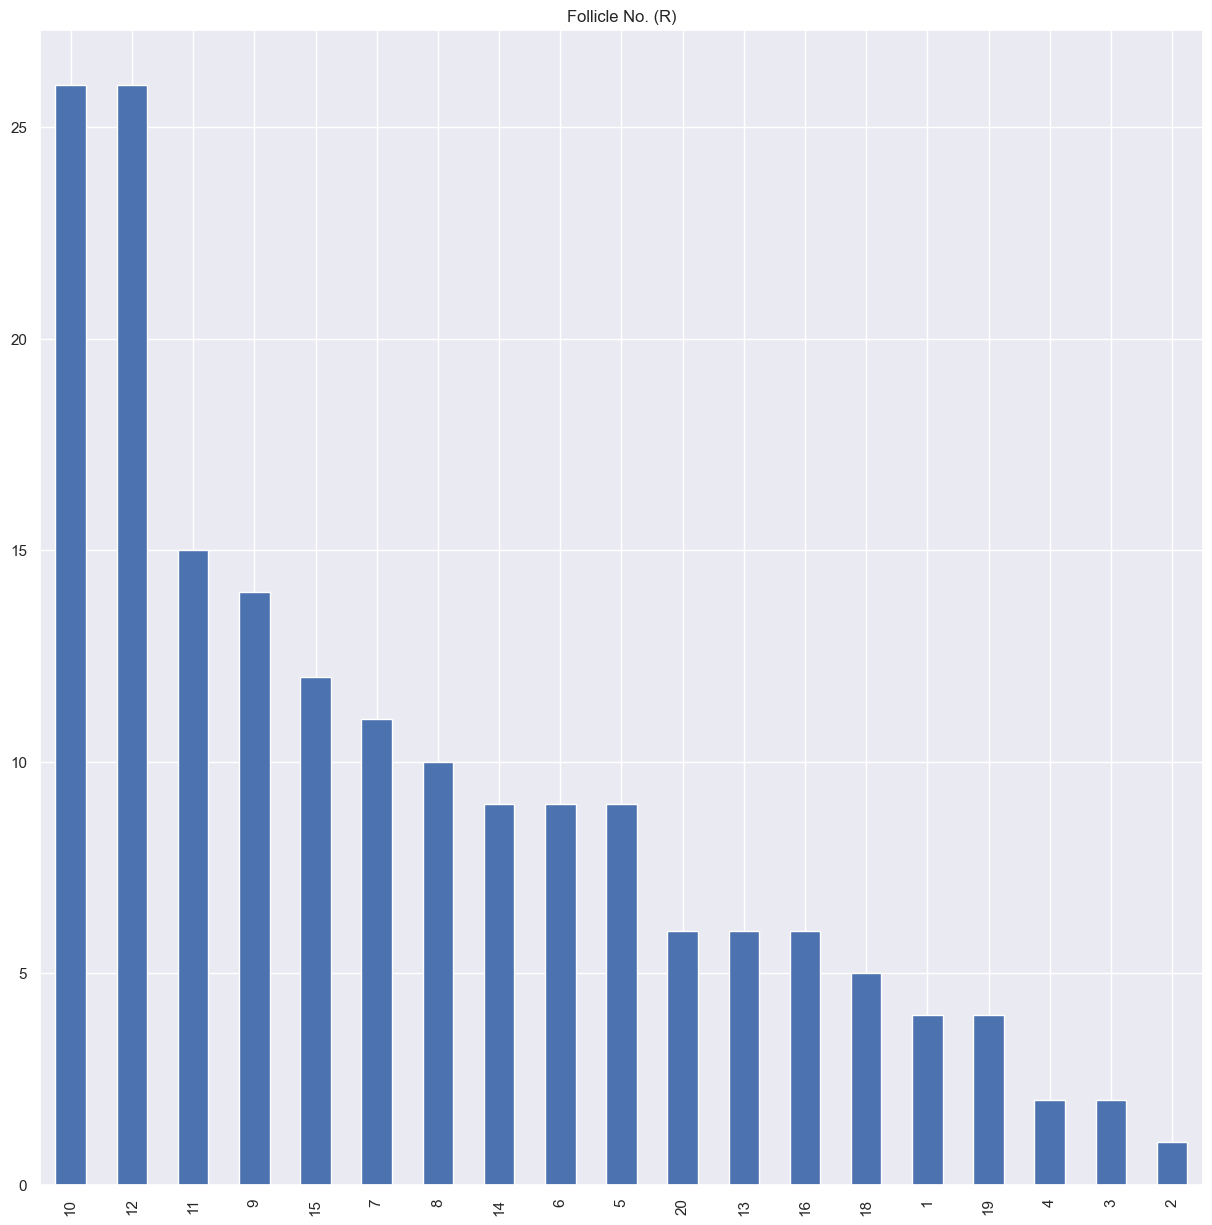

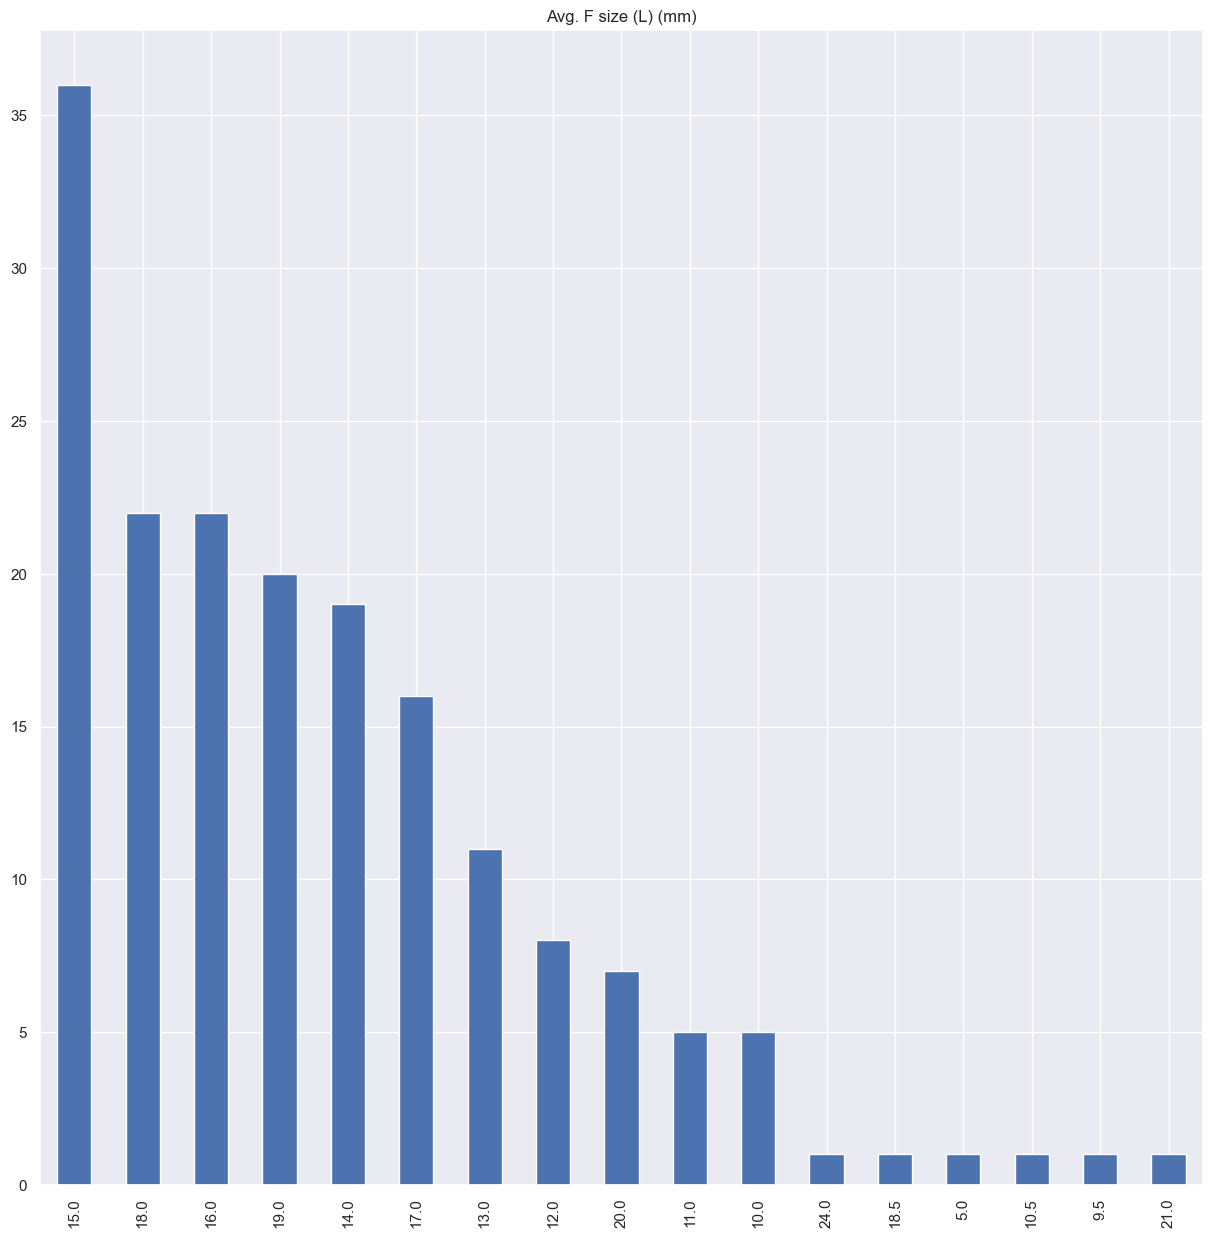

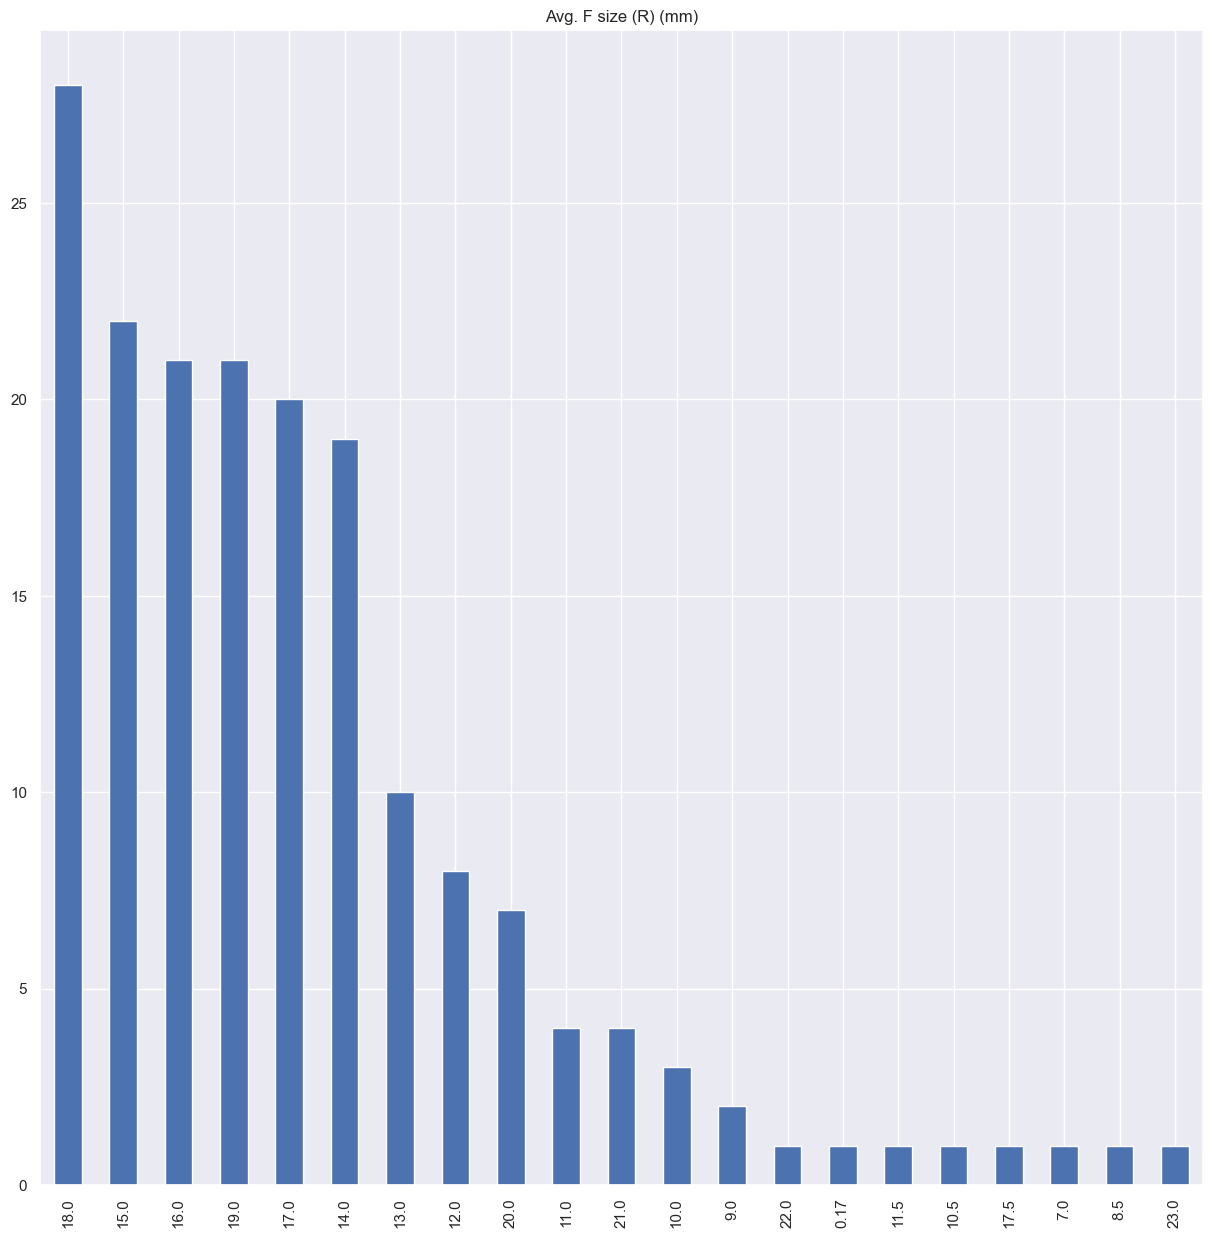

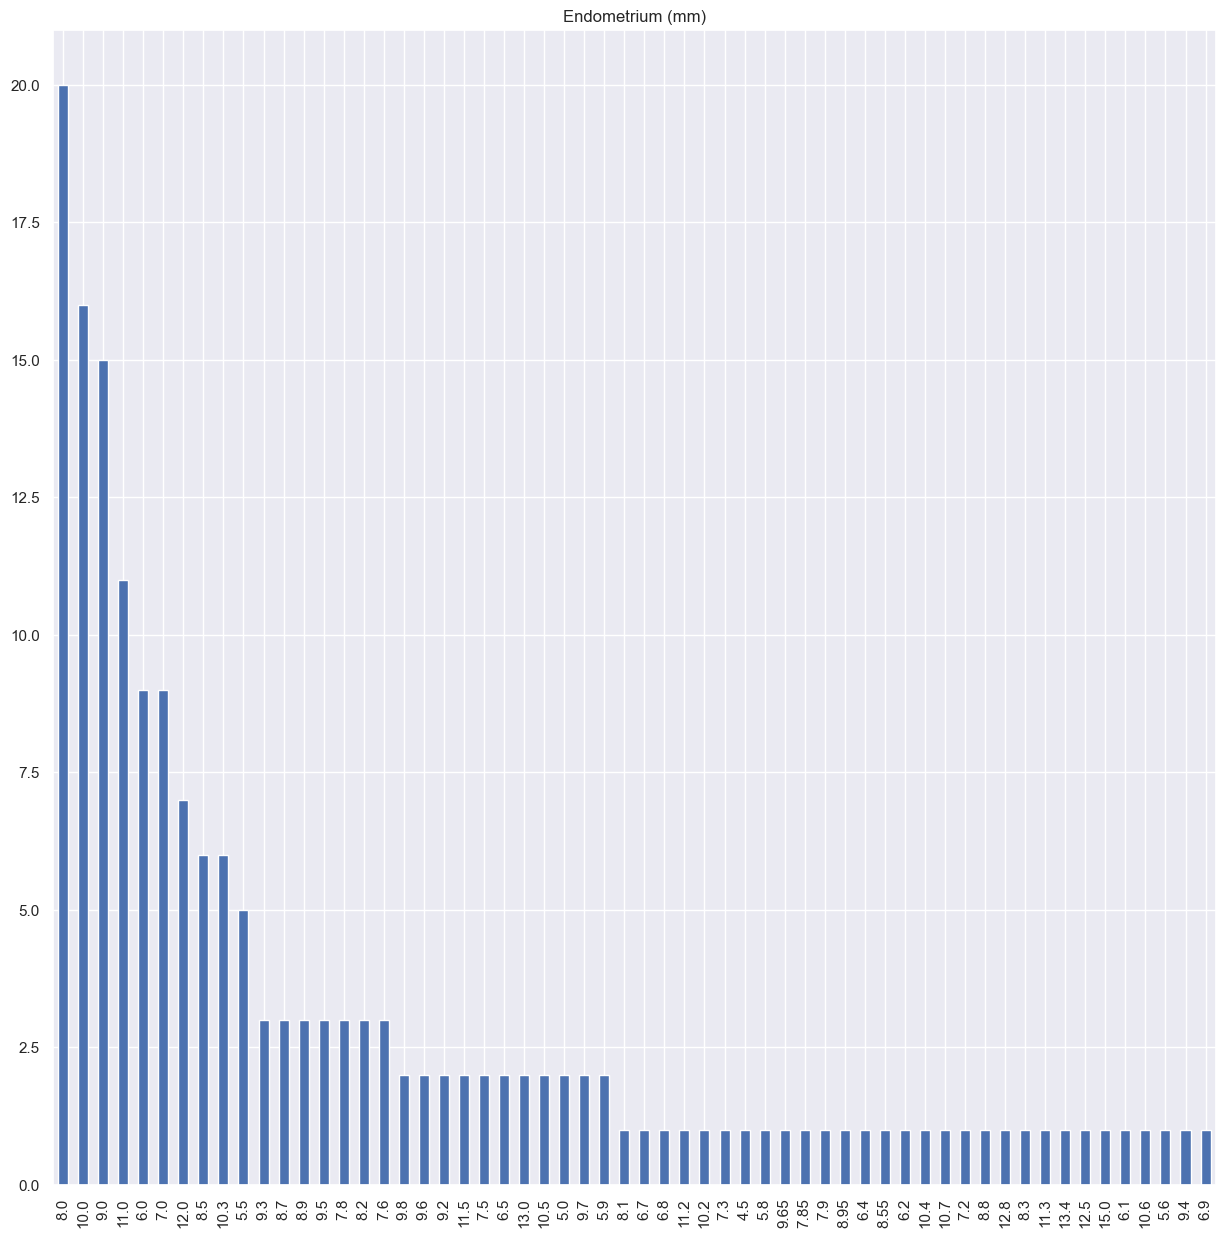

In [249]:
import matplotlib.pyplot as plt 
import seaborn as sns 
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)', 
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  dataset[dataset['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

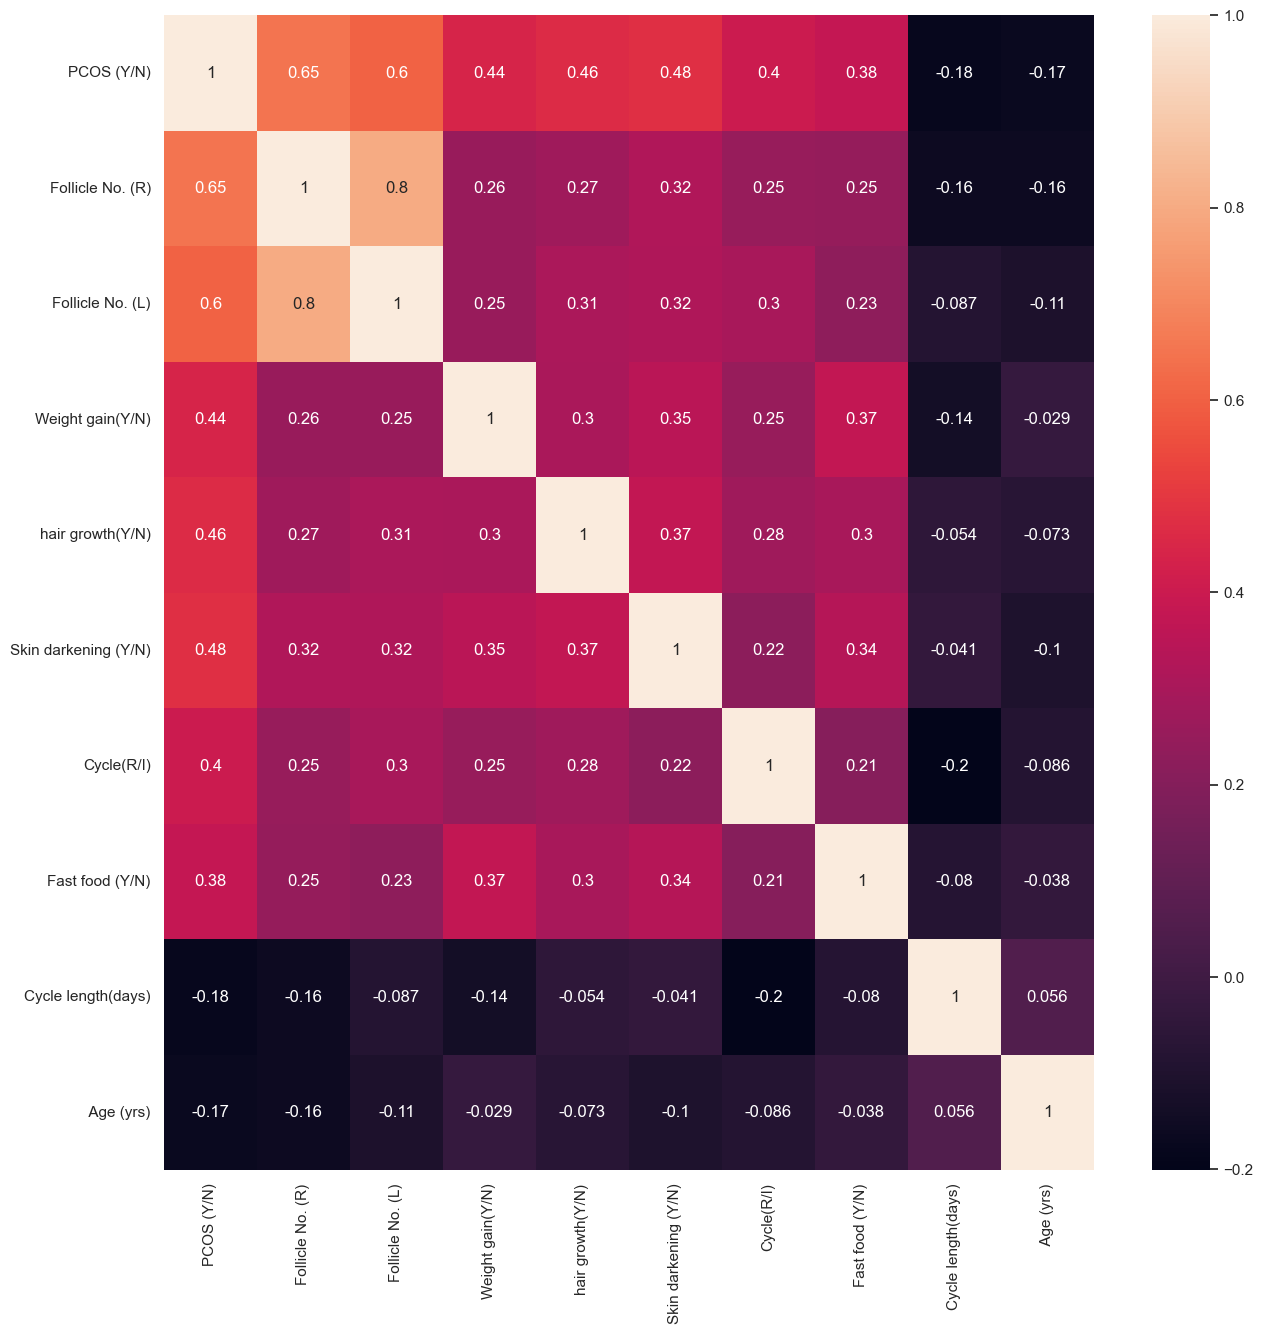

In [250]:
data = dataset[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Cycle(R/I)','Fast food (Y/N)','Cycle length(days)',' Age (yrs)']]
sns.heatmap(data.corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()

In [251]:


data =dataset.drop(['Unnamed: 44'], axis=1)
data['Marraige Status (Yrs)'].fillna(0,inplace = True)
data['Fast food (Y/N)'].fillna(0,inplace = True)

print(pd.isnull(data).sum())


Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [252]:
data.info()
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [253]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.513863,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500270,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


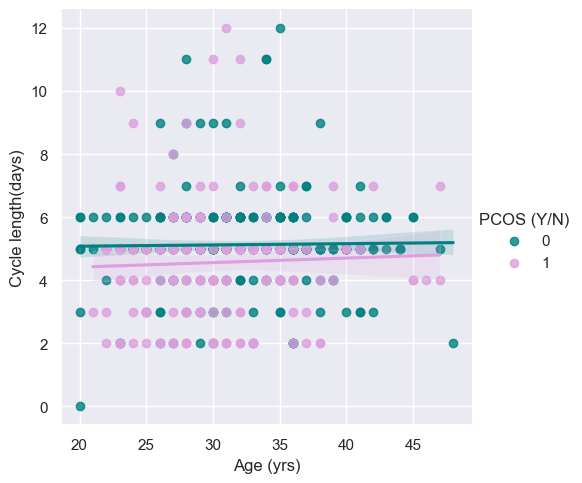

In [254]:
# Length of menstrual phase in PCOS vs normal 
import seaborn as sns
data.columns = [col.strip() for col in data.columns]
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

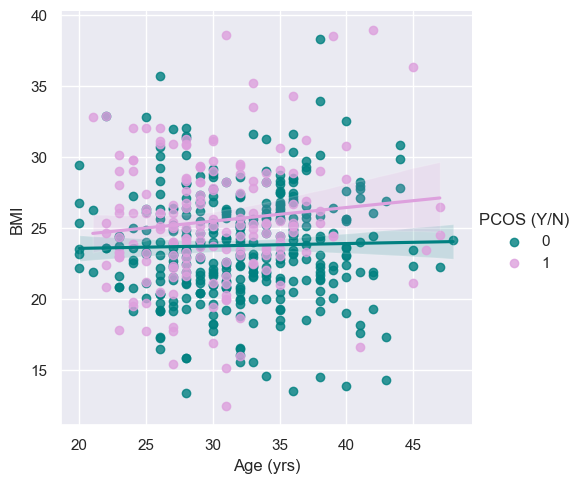

In [255]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

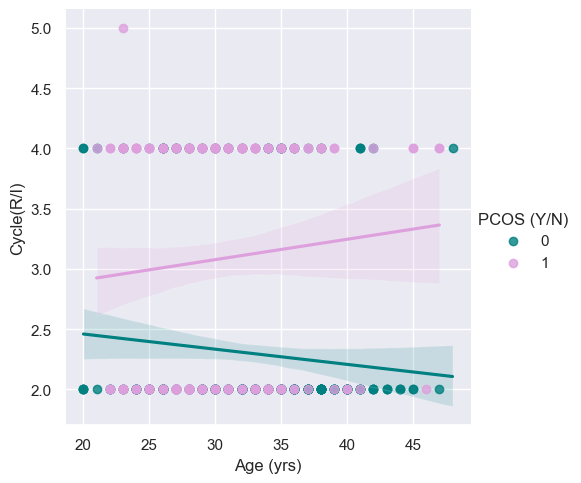

In [256]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

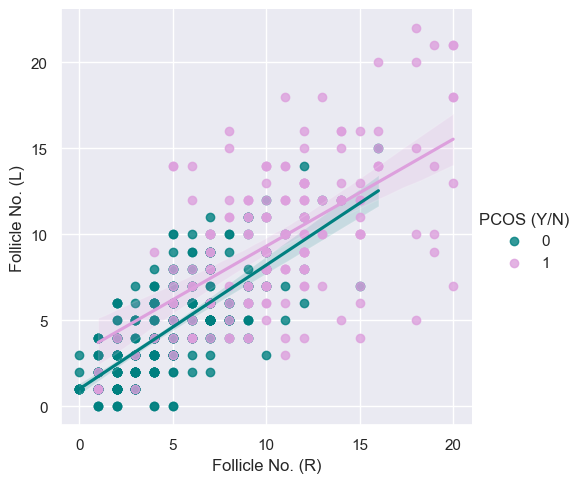

In [257]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

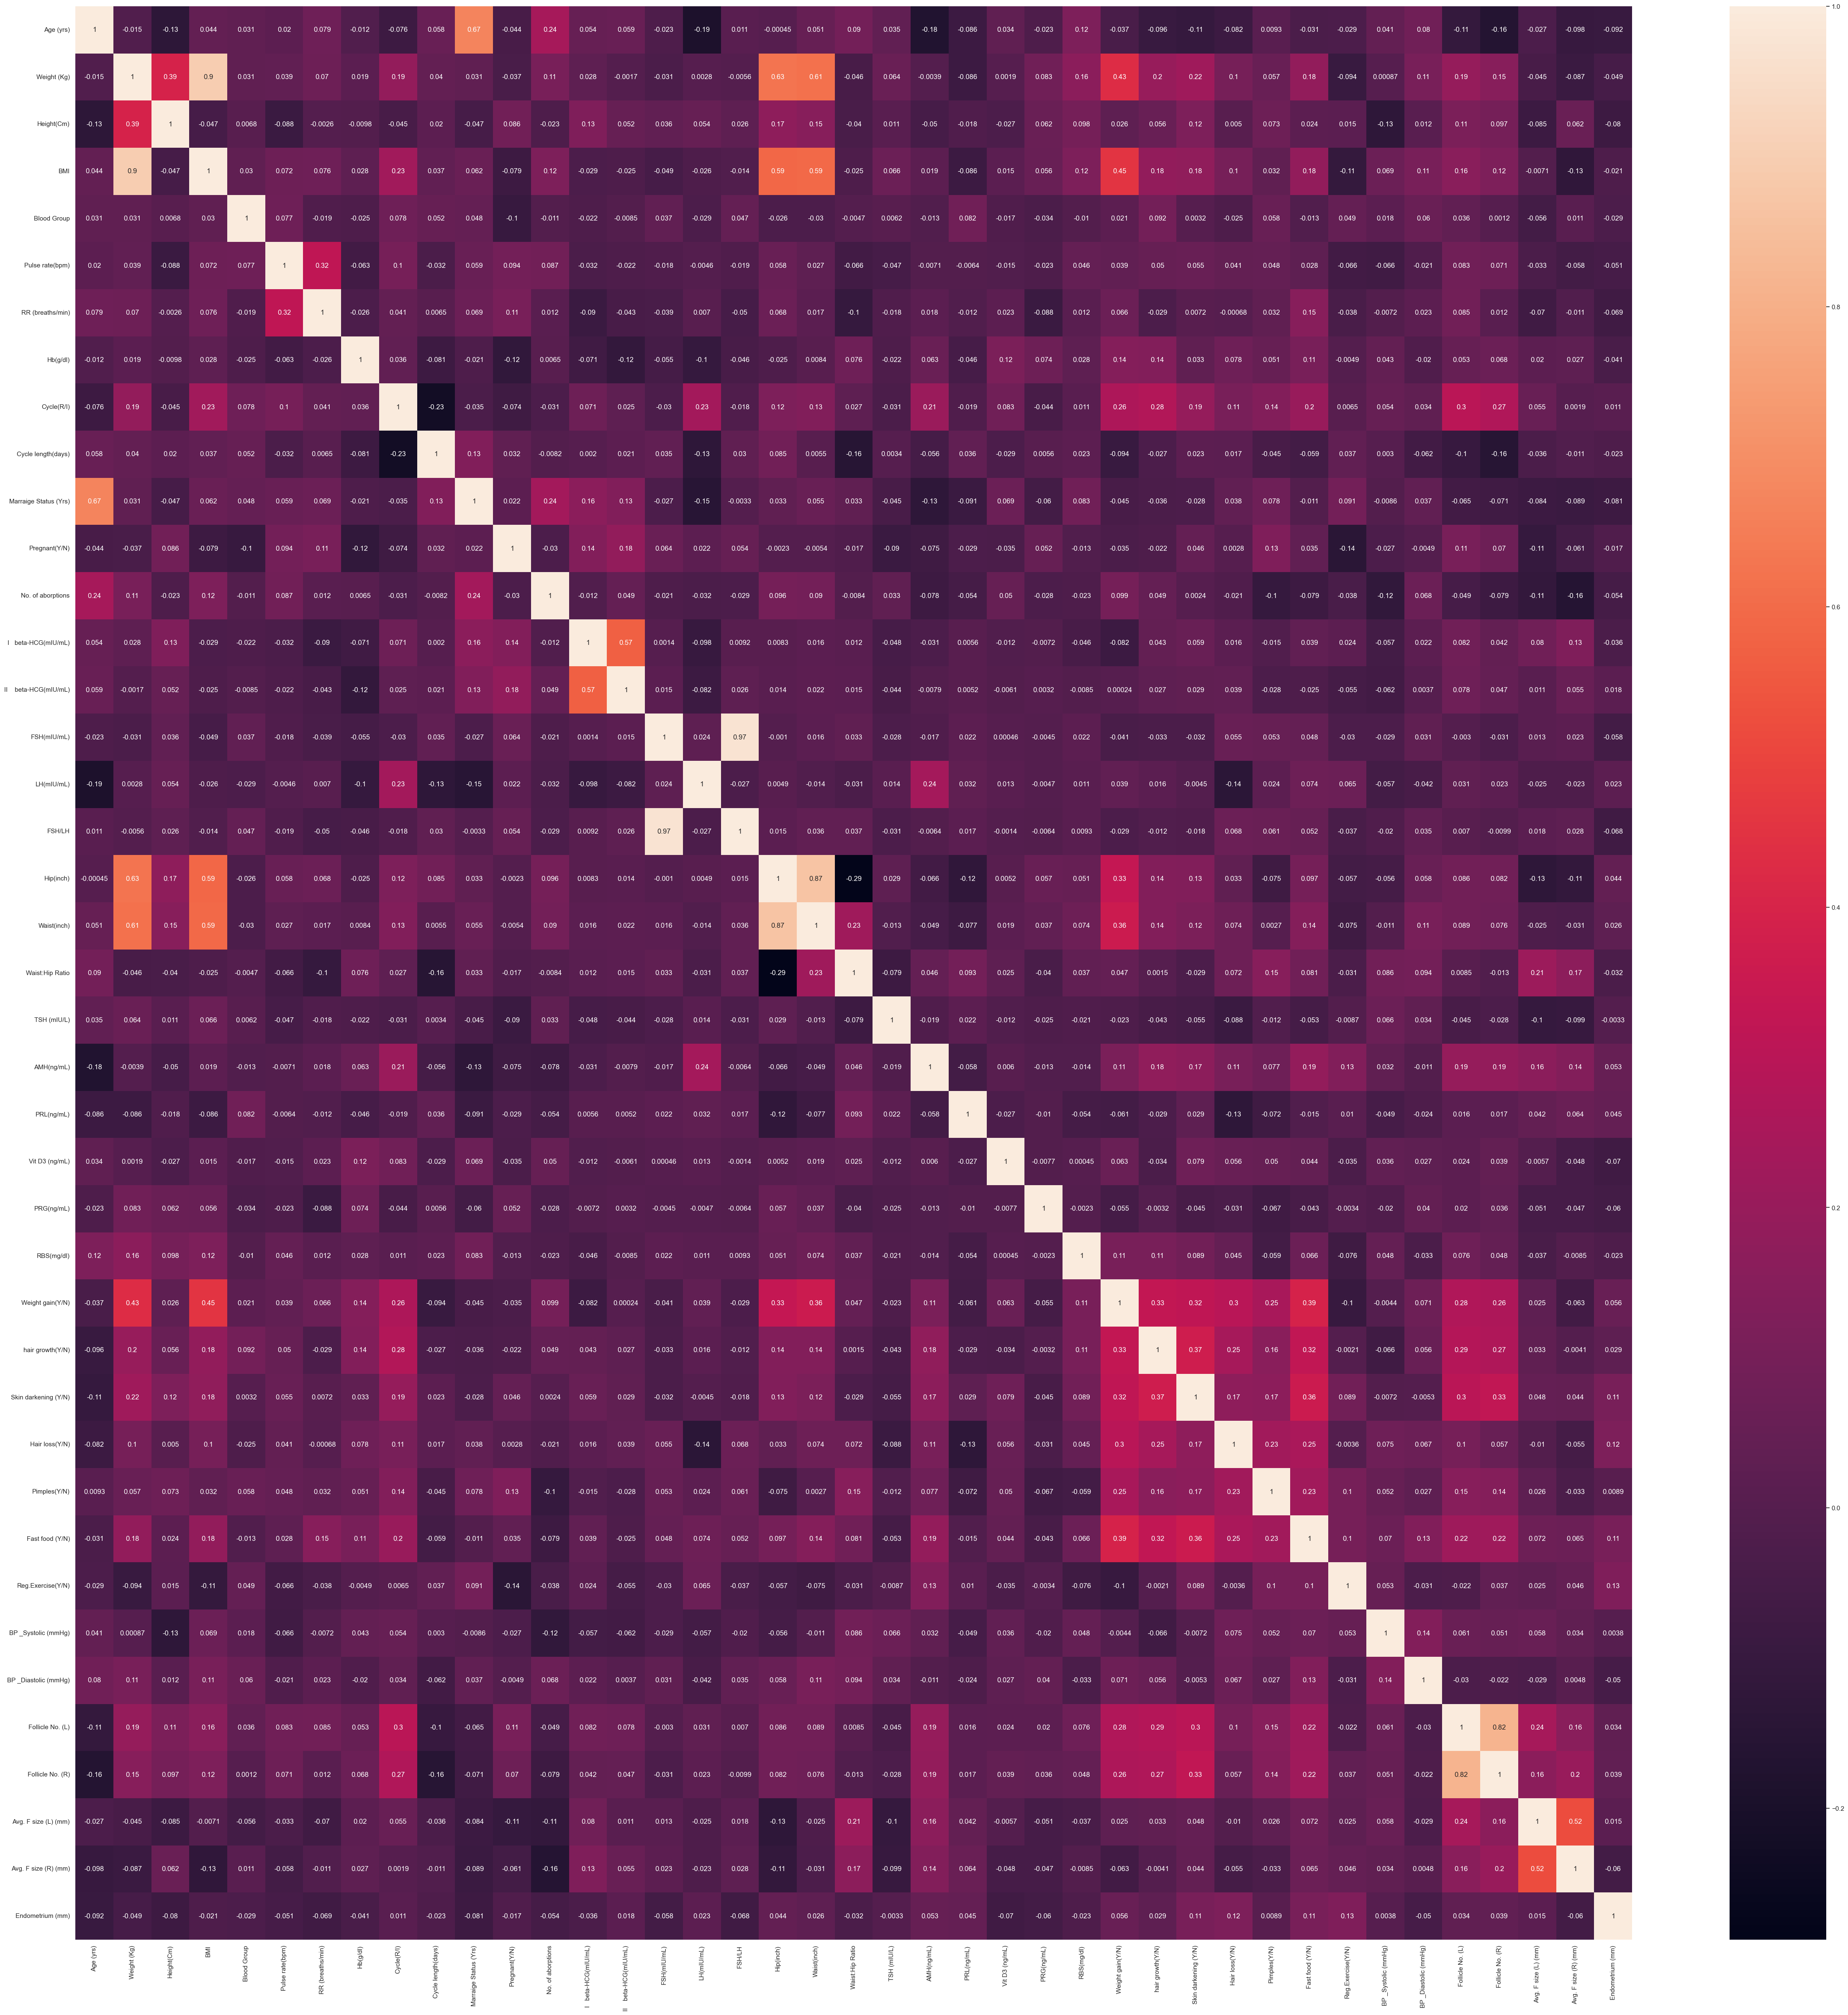

In [258]:
#heat map
import seaborn as sns

var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.3)
core=var_train.corr()
sns.set(rc = {'figure.figsize':(60,60)})

sns.heatmap(core,annot=True)
plt.show()

In [292]:
#feature selection
atr =[]
temp_atr=[]
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
for t in range(0,len(thresholds)):
    for i in range(len(core.columns)):
        for j in range(i):
            if abs(core.iloc[i,j])>thresholds[t]:
                col_name=core.columns[i]
                if col_name not in temp_atr:
                    temp_atr.append(col_name)

    # print("Threshold value :{}, attr :{}".format(thresholds[t],atr))
    # print(len(atr))
    atr.append(temp_atr)
    temp_atr=[]
print(atr)

[['Height(Cm)', 'BMI', 'RR (breaths/min)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'], ['Height(Cm)', 'BMI', 'RR (breaths/min)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of aborptions', 'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle N

In [293]:
from sklearn.model_selection import train_test_split
data['AMH(ng/mL)'].fillna(0,inplace = True)
data['II    beta-HCG(mIU/mL)'].fillna(0,inplace = True)



In [373]:
#decision tree
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import math
# features=[]
# pcosYN=[]
# notin=["Sl. No","Patient File No."]
# for i in data:
#     if i not in notin:
#         if i != "PCOS (Y/N)":
#             features.append(i)
#         else:
#             pcosYN.append(i)
#preprocessing
# data['II    beta-HCG(mIU/mL)'].fillna(0,inplace = True)


# cd=0
# for i in data[features]:
#     for j in data[i]:
#         cd+=1
#         if math.isnan(j):
#             print(i,":",cd)
            
               

#     cd=0
dtree = DecisionTreeClassifier()
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    dtree = dtree.fit(var_train, res_train)

# tree.plot_tree(dtree, feature_names=features)
    score = dtree.score(var_test, res_test)
    print("Threshold {} : {}".format(thresholds[i],score))



Threshold 0.1 : 0.8343558282208589
Threshold 0.2 : 0.803680981595092
Threshold 0.3 : 0.8834355828220859
Threshold 0.4 : 0.803680981595092
Threshold 0.5 : 0.7730061349693251
Threshold 0.6 : 0.7361963190184049
Threshold 0.7 : 0.8159509202453987
Threshold 0.8 : 0.7668711656441718
Threshold 0.9 : 0.656441717791411
Threshold 0.95 : 0.6503067484662577


In [333]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=29)

for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    clf.fit(var_train,res_train)

    train_x,train_y=var_train,res_train
    test_x,test_y=var_test,res_test
    train_accuracy=clf.score(var_train,res_train)

    test_accuracy=clf.score(var_test,res_test)
    # print("train accuracy : ",train_accuracy)
    print("Threshold {} : {}".format(thresholds[i],test_accuracy))


Threshold 0.1 : 0.8773006134969326
Threshold 0.2 : 0.8650306748466258
Threshold 0.3 : 0.8957055214723927
Threshold 0.4 : 0.8343558282208589
Threshold 0.5 : 0.8773006134969326
Threshold 0.6 : 0.7975460122699386
Threshold 0.7 : 0.8466257668711656
Threshold 0.8 : 0.7607361963190185
Threshold 0.9 : 0.6993865030674846
Threshold 0.95 : 0.7177914110429447


In [334]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
# datas=[]
# for i in range(0,540):
#     datas.append(data[features].iloc[i])
# x=data[features]
# y=data[pcosYN]
# predictvalue=list(data[features].iloc[540])
# print(data[pcosYN])
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    knn.fit(var_train,res_train)

    ypred=knn.predict(var_test)


    prediction = accuracy_score(ypred,res_test)
    print("Threshold {} : {}".format(thresholds[i],prediction))
    


Threshold 0.1 : 0.6073619631901841
Threshold 0.2 : 0.7668711656441718
Threshold 0.3 : 0.7423312883435583
Threshold 0.4 : 0.6748466257668712
Threshold 0.5 : 0.7423312883435583
Threshold 0.6 : 0.7668711656441718
Threshold 0.7 : 0.7423312883435583
Threshold 0.8 : 0.7484662576687117
Threshold 0.9 : 0.6319018404907976
Threshold 0.95 : 0.6503067484662577


In [364]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 70, random_state = 0)

for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)
    
    regressor.fit(var_train,res_train)
     
    print("Threshold {} : {}".format(thresholds[i],regressor.score(var_test,res_test)))


Threshold 0.1 : 0.5886446721545762
Threshold 0.2 : 0.6511707564672524
Threshold 0.3 : 0.582296393967423
Threshold 0.4 : 0.5063953512794482
Threshold 0.5 : 0.39732855304283876
Threshold 0.6 : 0.4580287017967226
Threshold 0.7 : 0.45773332593907123
Threshold 0.8 : 0.3935500752616654
Threshold 0.9 : -0.09550963990346917
Threshold 0.95 : -0.1617039840417247


In [369]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(random_state = 0)
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    classifier.fit(var_train,res_train)
    ypred=classifier.predict(var_test)
    accu=accuracy_score(res_test,ypred)
    print("Threshold {} : {}".format(thresholds[i],accu))


Threshold 0.1 : 0.8588957055214724
Threshold 0.2 : 0.8404907975460123
Threshold 0.3 : 0.8343558282208589
Threshold 0.4 : 0.7975460122699386
Threshold 0.5 : 0.8220858895705522
Threshold 0.6 : 0.8466257668711656
Threshold 0.7 : 0.8711656441717791
Threshold 0.8 : 0.8834355828220859
Threshold 0.9 : 0.6503067484662577
Threshold 0.95 : 0.656441717791411


In [370]:
#gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    gb_clf.fit(var_train,res_train)
    accu=gb_clf.score(var_test,res_test)
    print("Threshold {} : {}".format(thresholds[i],accu))

    

Threshold 0.1 : 0.7975460122699386
Threshold 0.2 : 0.8343558282208589
Threshold 0.3 : 0.8650306748466258
Threshold 0.4 : 0.7975460122699386
Threshold 0.5 : 0.852760736196319
Threshold 0.6 : 0.8404907975460123
Threshold 0.7 : 0.8588957055214724
Threshold 0.8 : 0.8957055214723927
Threshold 0.9 : 0.6809815950920245
Threshold 0.95 : 0.656441717791411


In [385]:
#cat boosting
from catboost import CatBoostClassifier
cat_features=[0,1,2,3,4,5,6,7,8]
clf = CatBoostClassifier(iterations=4,learning_rate=0.1)

for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    clf.fit(var_train, res_train)
    pred = clf.predict(var_test)
    accu=accuracy_score(pred,res_test)
    print("Threshold {} : {}".format(thresholds[i],accu))


0:	learn: 0.6067208	total: 4.17ms	remaining: 12.5ms
1:	learn: 0.5539170	total: 9.36ms	remaining: 9.36ms
2:	learn: 0.4902823	total: 13.8ms	remaining: 4.59ms
3:	learn: 0.4539764	total: 16.7ms	remaining: 0us
Threshold 0.1 : 0.8834355828220859
0:	learn: 0.6238704	total: 2.64ms	remaining: 7.93ms
1:	learn: 0.5640974	total: 4.66ms	remaining: 4.66ms
2:	learn: 0.5020077	total: 6.88ms	remaining: 2.29ms
3:	learn: 0.4394029	total: 9.06ms	remaining: 0us
Threshold 0.2 : 0.8957055214723927
0:	learn: 0.6419278	total: 1.74ms	remaining: 5.23ms
1:	learn: 0.6072839	total: 3.36ms	remaining: 3.36ms
2:	learn: 0.5780352	total: 4.93ms	remaining: 1.64ms
3:	learn: 0.5455182	total: 6.74ms	remaining: 0us
Threshold 0.3 : 0.8588957055214724
0:	learn: 0.6565293	total: 1.53ms	remaining: 4.58ms
1:	learn: 0.6174048	total: 2.54ms	remaining: 2.54ms
2:	learn: 0.5857091	total: 3.92ms	remaining: 1.31ms
3:	learn: 0.5549110	total: 5.75ms	remaining: 0us
Threshold 0.4 : 0.8588957055214724
0:	learn: 0.6580331	total: 2.2ms	remaini

In [371]:
#xg boosting
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


model = XGBClassifier()
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    model.fit(var_train, res_train)

    y_pred = model.predict(var_test)
    predictions = [round(value) for value in y_pred]


    accuracy = accuracy_score(res_test, predictions)
    print("Threshold {} : {}".format(thresholds[i],accuracy))


Threshold 0.1 : 0.901840490797546
Threshold 0.2 : 0.8957055214723927
Threshold 0.3 : 0.8895705521472392
Threshold 0.4 : 0.7914110429447853
Threshold 0.5 : 0.8404907975460123
Threshold 0.6 : 0.8343558282208589
Threshold 0.7 : 0.8159509202453987
Threshold 0.8 : 0.803680981595092
Threshold 0.9 : 0.656441717791411
Threshold 0.95 : 0.6319018404907976


In [357]:
# linear svm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    svclassifier.fit(var_train,res_train)

    y_pred = svclassifier.predict(var_test)
    accu=accuracy_score(res_test,y_pred)
    print("Threshold {} : {}".format(thresholds[i],accu))


Threshold 0.1 : 0.8588957055214724
Threshold 0.2 : 0.8588957055214724
Threshold 0.3 : 0.8895705521472392
Threshold 0.4 : 0.852760736196319
Threshold 0.5 : 0.803680981595092
Threshold 0.6 : 0.8957055214723927
Threshold 0.7 : 0.8404907975460123
Threshold 0.8 : 0.8282208588957055
Threshold 0.9 : 0.6932515337423313
Threshold 0.95 : 0.5828220858895705


In [329]:
#radial svm

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    svclassifier.fit(var_train,res_train)

    y_pred = svclassifier.predict(var_test)
    accu=accuracy_score(res_test,y_pred)
    print("Threshold {} : {}".format(thresholds[i],accu))



Threshold 0.1 : 0.6809815950920245
Threshold 0.2 : 0.6625766871165644
Threshold 0.3 : 0.6748466257668712
Threshold 0.4 : 0.6809815950920245
Threshold 0.5 : 0.7116564417177914
Threshold 0.6 : 0.8159509202453987
Threshold 0.7 : 0.8343558282208589
Threshold 0.8 : 0.803680981595092
Threshold 0.9 : 0.6441717791411042
Threshold 0.95 : 0.6871165644171779


In [330]:
#linear discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    lda.fit_transform(var_train, res_train)
    y_pred = lda.predict(var_test)
    accu=accuracy_score(res_test,y_pred)
    print("Threshold {} : {}".format(thresholds[i],accu))




Threshold 0.1 : 0.8895705521472392
Threshold 0.2 : 0.8650306748466258
Threshold 0.3 : 0.9386503067484663
Threshold 0.4 : 0.852760736196319
Threshold 0.5 : 0.8098159509202454
Threshold 0.6 : 0.852760736196319
Threshold 0.7 : 0.8588957055214724
Threshold 0.8 : 0.8098159509202454
Threshold 0.9 : 0.6319018404907976
Threshold 0.95 : 0.7361963190184049


In [331]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_model_default = QuadraticDiscriminantAnalysis()
for i in range(len(atr)):
    aa=atr[i]
    var_train, var_test, res_train, res_test = train_test_split(data[aa],data[pcosYN], test_size = 0.3)

    QDA_model_default.fit(var_train, res_train)
    y_pred_QDA_default =QDA_model_default.predict(var_test)
    accu=accuracy_score(y_pred_QDA_default,res_test)
    print("Threshold {} : {}".format(thresholds[i],accu))


Threshold 0.1 : 0.8343558282208589
Threshold 0.2 : 0.8711656441717791
Threshold 0.3 : 0.8957055214723927
Threshold 0.4 : 0.8711656441717791
Threshold 0.5 : 0.7484662576687117
Threshold 0.6 : 0.8282208588957055
Threshold 0.7 : 0.5828220858895705
Threshold 0.8 : 0.7484662576687117
Threshold 0.9 : 0.3496932515337423
Threshold 0.95 : 0.31901840490797545
